# Seoul Bike Sharing Demand Prediction
---


### **Problem Statement** 

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


##**Importing Required Libraries** :
All required libraries are imported at once in order to have smooth workflow. These libraries have been used in data manipulation, plotting graphs, modelling etc.

In [314]:
#data visualization libraries(matplotlib,seaborn, plotly)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("ticks")
sns.set_context("poster");
import plotly.express as px
from scipy.stats import norm

# Importing numpy, pandas and tensorflow
import pandas as pd
import numpy as np


# Datetime library for manipulating Date columns.
from datetime import datetime
import calendar

# from sci-kit library scaling, transforming and labeling functions are brought
# which is used to change raw feature vectors into a representation that is more 
# suitable for the downstream estimators. 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import  LabelEncoder

# Importing various machine learning models.
from sklearn.linear_model import Lasso, Ridge, LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from lightgbm import LGBMRegressor
import lightgbm


# XGB regressor.
from xgboost import XGBRegressor

#calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# spilitting data
from sklearn.model_selection import train_test_split

#for optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Import different metrics from sci-kit libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error


# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 50
pd.options.display.float_format = "{:.3f}".format

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

## **Loading Data**

---

In order to proceed, we have to bring in data into the playground. This is basically the raw data which we will filter into features so that it can be used to build the predictive model.

In [315]:
b_data = pd.read_csv("SeoulBikeData.csv",encoding = "ISO-8859-1") 

##**Studying Data (Data Wrangling)**

---

Basic information about data is studied using head, info, describe function.

In [316]:
#displaying data from file using head function 
b_data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0           -5.200           37   
1  01/12/2017                204     1           -5.500           38   
2  01/12/2017                173     2           -6.000           39   
3  01/12/2017                107     3           -6.200           40   
4  01/12/2017                 78     4           -6.000           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0             2.200              2000                    -17.600   
1             0.800              2000                    -17.600   
2             1.000              2000                    -17.700   
3             0.900              2000                    -17.600   
4             2.300              2000                    -18.600   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                    0.000         0.000          0.000  Winter  No Holiday   
1                    0.000         0.000          0.000  Winter  No Holiday   
2                    0.000         0.000          0.000  Winter  No Holiday   
3                    0.000         0.000          0.000  Winter  No Holiday   
4                    0.000         0.000          0.000  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### **Different features and their description**
   
> A feature is an input variable in simple linear regression. A simple machine learning project might use a single feature, while a more sophisticated machine learning 
project could use millions of features.

#### **Describing DataSet**

---
<b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


#### <b>Attribute Information: </b>

*  Date : year-month-day
*  Rented_Bike_Count - Count of bikes rented at each hour
*  Hour - Hour of he day
*  Temperature-Temperature in Celsius
*  Humidity - %
*  Windspeed - m/s
*  Visibility - 10m
*  Dew point temperature - Celsius
*  Solar radiation - MJ/m2
*  Rainfall - mm
*  Snowfall - cm
*  Seasons - Winter, Spring, Summer, Autumn
*  Holiday - Holiday/No holiday
*  Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [317]:
#describing dataset to get Statistical info
b_data.describe().T             #.T is used to transpose the table, we can also use transpose() function

count     mean     std     min     25%      50%  \
Rented Bike Count         8760.000  704.602 644.997   0.000 191.000  504.500   
Hour                      8760.000   11.500   6.923   0.000   5.750   11.500   
Temperature(°C)           8760.000   12.883  11.945 -17.800   3.500   13.700   
Humidity(%)               8760.000   58.226  20.362   0.000  42.000   57.000   
Wind speed (m/s)          8760.000    1.725   1.036   0.000   0.900    1.500   
Visibility (10m)          8760.000 1436.826 608.299  27.000 940.000 1698.000   
Dew point temperature(°C) 8760.000    4.074  13.060 -30.600  -4.700    5.100   
Solar Radiation (MJ/m2)   8760.000    0.569   0.869   0.000   0.000    0.010   
Rainfall(mm)              8760.000    0.149   1.128   0.000   0.000    0.000   
Snowfall (cm)             8760.000    0.075   0.437   0.000   0.000    0.000   

                               75%      max  
Rented Bike Count         1065.250 3556.000  
Hour                        17.250   23.000  
Temperature(°C)             22.500   39.400  
Humidity(%)                 74.000   98.000  
Wind speed (m/s)             2.300    7.400  
Visibility (10m)          2000.000 2000.000  
Dew point temperature(°C)   14.800   27.200  
Solar Radiation (MJ/m2)      0.930    3.520  
Rainfall(mm)                 0.000   35.000  
Snowfall (cm)                0.000    8.800

*   For mixed data types provided via a DataFrame, the default is to return only an analysis of numeric columns. If the dataframe consists only of object and categorical data without any numeric columns, the default is to return an analysis of both the object and categorical columns. If include='all' is provided as an option, the result will include a union of attributes of each type.

* We may not need to perform extensive data cleansing because the ranges of values in the numerical columns appear fair as well. However,columns like **Wind speed** , **Dew_point_temperature**, **Solar Radiation**, **Rainfall** and **Snowfall** appears to be skewed as their **median** (50 percentile) is much **lower** than the **highest value**.

In [318]:
#converting few names for convenience
b_data.rename({"Temperature(°C)": "Temperature",  
               "Functioning Day":"Functioning_Day",
                "Humidity(%)": "Humidity",  
                "Wind speed (m/s)": "Wind_speed",
                "Visibility (10m)": "Visibility",
                "Dew point temperature(°C)": "Dew_point_temperature",
                "Solar Radiation (MJ/m2)": "Solar_Radiation",
                "Snowfall (cm)": "Snowfall",
                "Rainfall(mm)": "Rainfall",
                "Rented Bike Count": "Rented_Bike_Count"},  
                axis = "columns", inplace = True) 

In [319]:
#@title Printing information about a DataFrame including the index dtype and columns, non-null values and memory usage
b_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented_Bike_Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind_speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew_point_temperature  8760 non-null   float64
 8   Solar_Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning_Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

In [320]:
#@title printing shape of the dataset
print(f'Shape : {b_data.shape} \n' )
print(f' Features : {b_data.columns.to_list()}')   #to_list convert series to list

Shape : (8760, 14) 

 Features : ['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day']


> * The dataset has total number of 8760 values with 14 different features. Luckily, there are no null values.
> * There are 10 numerical [ 'Rented_Bike_Count', 'Hour', 'Temperature(°C)', 'Humidity', 'Wind_speed',  'Visibility ', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall' ] and 4 categorial feature ('Date', 'Seasons', 'Holiday', 'Functioning_Day').
> * However, date has data type of object which should be further treated to have correct data type and as per data description hour represents timestamp.

In [321]:
#checking null values for confirmation
b_data.isnull().sum()

Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64

In [322]:
#checking for duplicates
b_data.duplicated().value_counts()                #duplicated Return boolean Series denoting duplicate rows

False    8760
Name: count, dtype: int64

* **Dataset has 8760 unique value and there is no repetition.**

**Changing Date data type**

In [323]:
#creating copy to keep oringal data safe
df = b_data.copy()

In [324]:
df.head()

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
0  01/12/2017                254     0       -5.200        37       2.200   
1  01/12/2017                204     1       -5.500        38       0.800   
2  01/12/2017                173     2       -6.000        39       1.000   
3  01/12/2017                107     3       -6.200        40       0.900   
4  01/12/2017                 78     4       -6.000        36       2.300   

   Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
0        2000                -17.600            0.000     0.000     0.000   
1        2000                -17.600            0.000     0.000     0.000   
2        2000                -17.700            0.000     0.000     0.000   
3        2000                -17.600            0.000     0.000     0.000   
4        2000                -18.600            0.000     0.000     0.000   

  Seasons     Holiday Functioning_Day  
0  Winter  No Holiday             Yes  
1  Winter  No Holiday             Yes  
2  Winter  No Holiday             Yes  
3  Winter  No Holiday             Yes  
4  Winter  No Holiday             Yes

In [325]:
# Changing Date data type correctly
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

### Extracting date, month, year from date and adding to dataset

In [326]:
#Extracting month from date column
df['month'] = pd.DatetimeIndex(df['Date']).month
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])

#Extracting day name from date
df['day'] = df['Date'].dt.day_name()

#Extracting year
df['year'] = df['Date'].dt.year

df.head(1)

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
0 2017-12-01                254     0       -5.200        37       2.200   

   Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
0        2000                -17.600            0.000     0.000     0.000   

  Seasons     Holiday Functioning_Day month     day  year  
0  Winter  No Holiday             Yes   Dec  Friday  2017

In [327]:
# funciton to count total number of different value in specific column
def total(df,var):
  total = len(df[var].value_counts())
  return total


In [328]:
#calculating total count of different value in each column
total_lenght_different_column = {
    'Seasons': total(df,'Seasons'),
    'Holiday': total(df,'Holiday'),
    'Funtioning_Day': total(df,'Functioning_Day'),
    'month' : total(df,'month'),
    'day'   : total(df,'day'),
    'year'  : total(df,'year')
}


In [329]:
total_df = pd.DataFrame.from_dict(total_lenght_different_column,orient='index')

In [330]:
# dropping Date column
df.drop(columns=['Date'],inplace=True)
df.head(1)

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254     0       -5.200        37       2.200        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                -17.600            0.000     0.000     0.000  Winter   

      Holiday Functioning_Day month     day  year  
0  No Holiday             Yes   Dec  Friday  2017

* Here, **hour** feature has numerical value but it explains timestamp.

In [331]:
df.head()

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254     0       -5.200        37       2.200        2000   
1                204     1       -5.500        38       0.800        2000   
2                173     2       -6.000        39       1.000        2000   
3                107     3       -6.200        40       0.900        2000   
4                 78     4       -6.000        36       2.300        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                -17.600            0.000     0.000     0.000  Winter   
1                -17.600            0.000     0.000     0.000  Winter   
2                -17.700            0.000     0.000     0.000  Winter   
3                -17.600            0.000     0.000     0.000  Winter   
4                -18.600            0.000     0.000     0.000  Winter   

      Holiday Functioning_Day month     day  year  
0  No Holiday             Yes   Dec  Friday  2017  
1  No Holiday             Yes   Dec  Friday  2017  
2  No Holiday             Yes   Dec  Friday  2017  
3  No Holiday             Yes   Dec  Friday  2017  
4  No Holiday             Yes   Dec  Friday  2017

In [332]:
df.shape

(8760, 16)

In [333]:
# converting hour feature into categorial by changing is type 
df['Hour']=df['Hour'].astype('object')

* Categorial data are those values which can be used to classify information based on similarities.

* Numerical data is the information expressed numerically.

In [334]:
#total count of different value in
total_df.T

Seasons  Holiday  Funtioning_Day  month  day  year
0        4        2               2     12    7     2

* The above result shows that, features described above do not have much number of different count, and it can be categorised into 2 - 12 different category, therefore while achieving result, converting them into object data type or changing them into categorial feature than using it as int which will help while encoding them.

In [335]:
df['year'] = df['year'].astype('object')

In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   object 
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  month                  8760 non-null   object 
 14  day                    8760 non-null   object 
 15  year

## **Exploratory Data Analysis**

---
Primary goal was to explore data, to identify relationship between different features to answer the question to achieve the objective of the project using **univariate analysis**, **bivariate analysis** and **multivariate analysis**. 

> What feature will help in achieving stable bike demand every hour?

### **VISUALIZATION**

---

Different form of charts are used to visualize data with respect to bike count (target value), to know how it can be related to other features. Visualization is carried out using **seaborn** and **matplotlib** library.

In [337]:
#creating copy
dfr = df.copy()

In [338]:
dfr.shape

(8760, 16)

In [339]:
#storing numerical feature in separate variable
num_feature = dfr.select_dtypes(exclude='object')    #Return a subset of the DataFrame’s columns based on the column dtypes
print(f'Numerical feature : {num_feature.columns.to_list()}')

Numerical feature : ['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall']


In [340]:
#storing categorial feature in separate variable
cat_feature = dfr.loc[:,  ~dfr.columns.isin(num_feature.columns.to_list())] #Pandas isin() method is used to filter data frames using boolean value true of false
print(f'Categorical feature : {cat_feature.columns.to_list()}')               #Tilde sign (~)works as a negation operator i.e reverse true to false and false to true

Categorical feature : ['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month', 'day', 'year']


#### **Univariate Analysis**

In [341]:
#analysing numerical value using density plot with mean and median
def density_plot(dfr,num_feature):
  graph = plt.figure(figsize = (20,30))
  for i,col in enumerate(num_feature) :
    sns.set_context('poster');
    plt.subplot(6,2,i+1);
    sns.distplot(dfr[col], color = '#055E85', fit = norm);
    feature = dfr[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #Rose-Red Color indicate mean of data
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #Cyan indicate median of data
    plt.title(f'{col.title()}');
    plt.tight_layout();

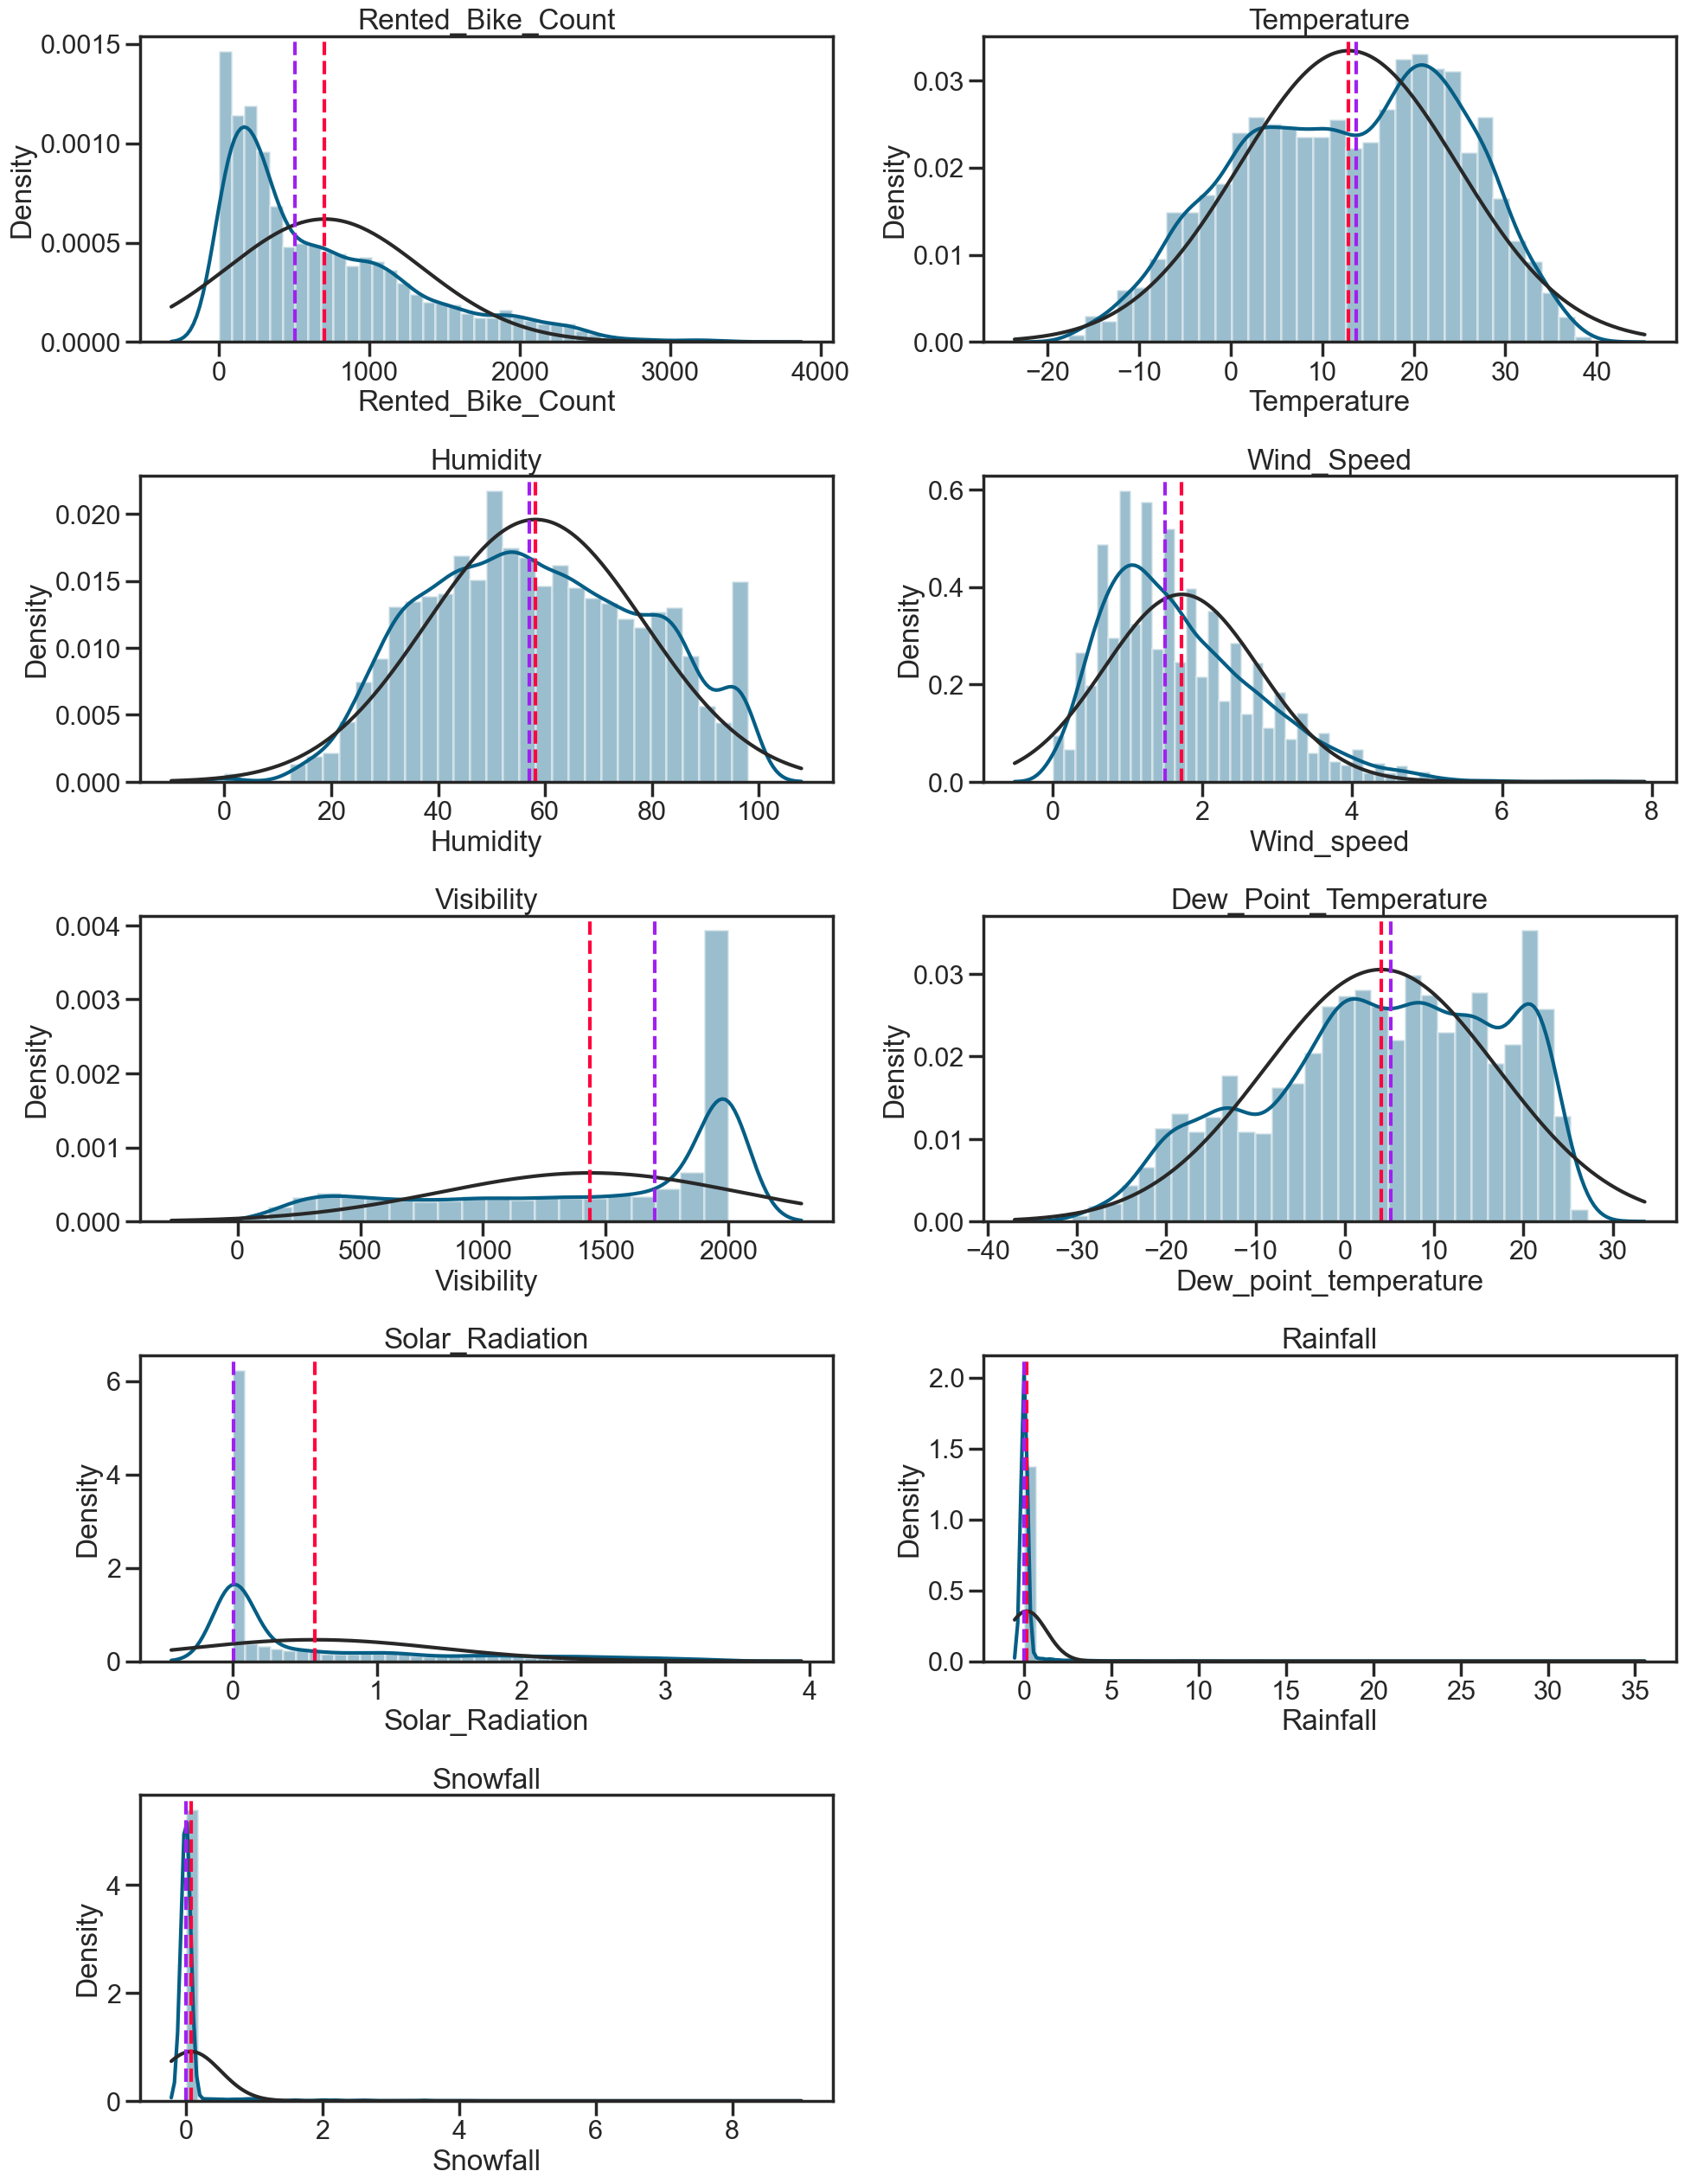

In [342]:
density_plot(dfr,num_feature)

---
* **skew** = measure of asymmetry of a distribution

* **kurtosis** = quantify shape of a distribution

In [343]:
df.select_dtypes(include='number').agg(['skew', 'kurtosis']).T

skew  kurtosis
Rented_Bike_Count      1.153     0.853
Temperature           -0.198    -0.838
Humidity               0.060    -0.804
Wind_speed             0.891     0.727
Visibility            -0.702    -0.962
Dew_point_temperature -0.367    -0.755
Solar_Radiation        1.504     1.126
Rainfall              14.533   284.991
Snowfall               8.441    93.803

* From the above graph we can summarise that:
  
  **Right**/Positive Skewed Distribution: Mode < Median < Mean: **Rented_Bike_Count**, **Wind_speed**, **Solar Radiation**

  **No Skew**: Mean = Median = Mode : **Hour**, **Temperature**, **Humidity**,**Rainfall**,**Snowfall**

  **Left**/Negative Skewed Distribution: Mean < Median < Mode: **visibility**

#### **Bivariate Analysis**

<Figure size 1500x600 with 0 Axes>

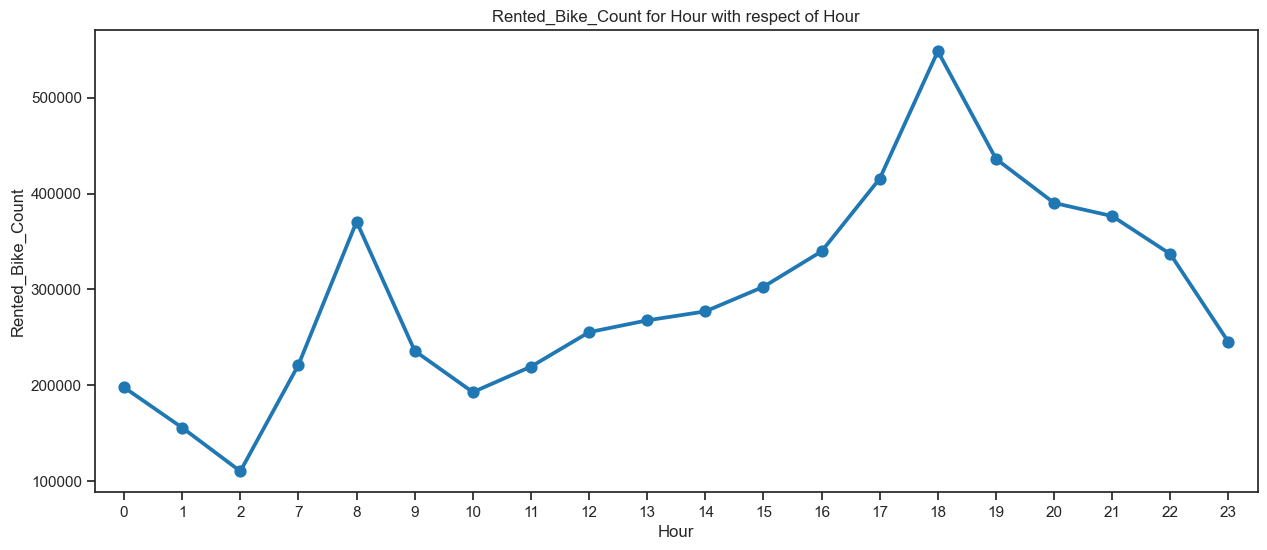

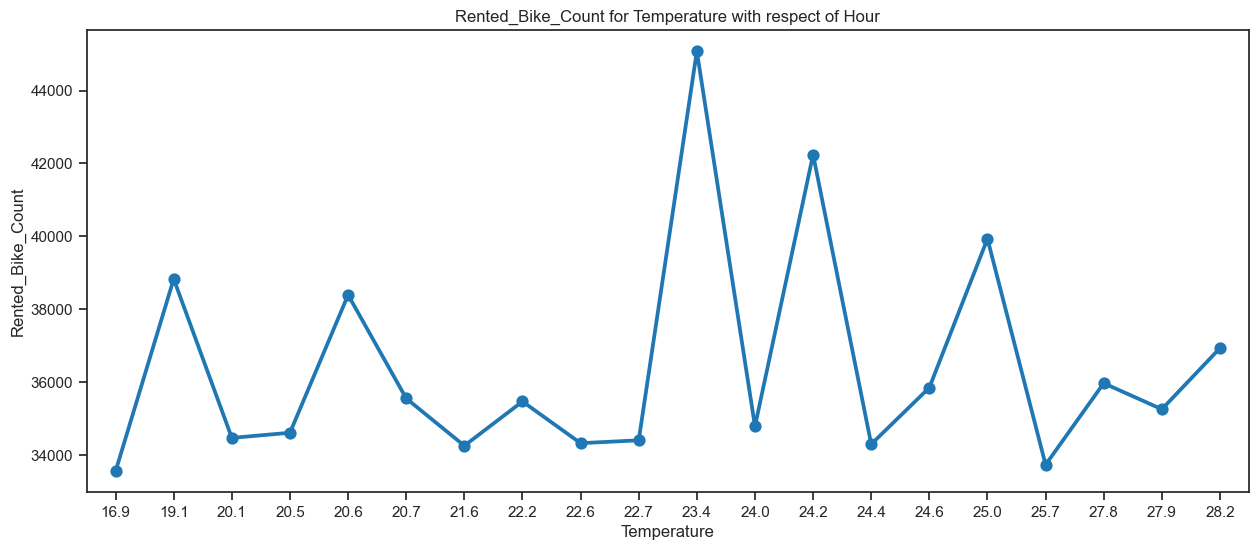

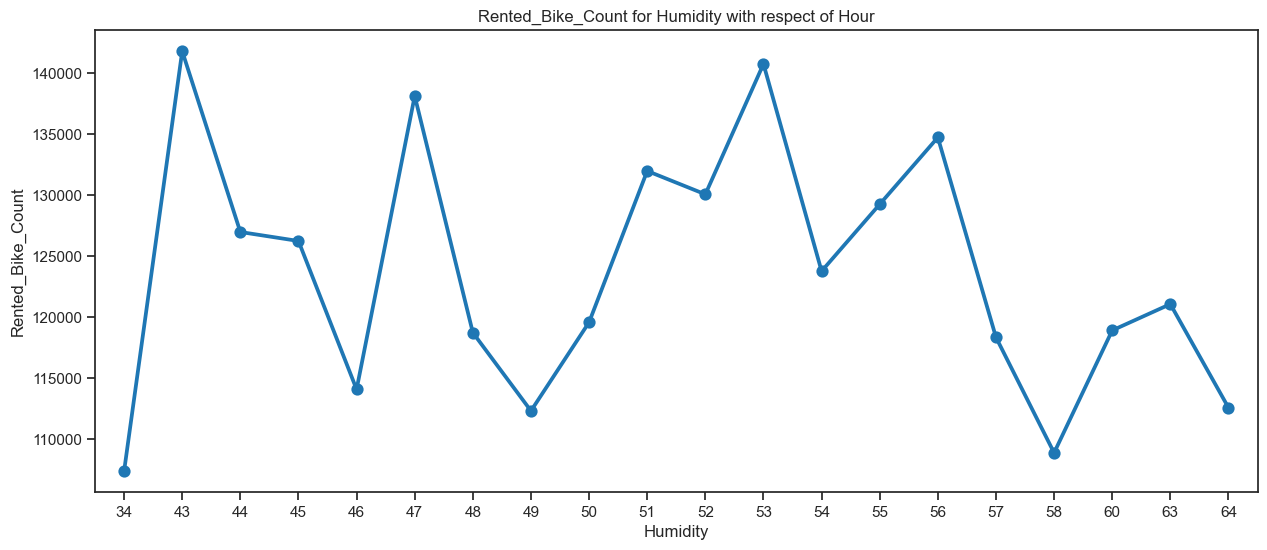

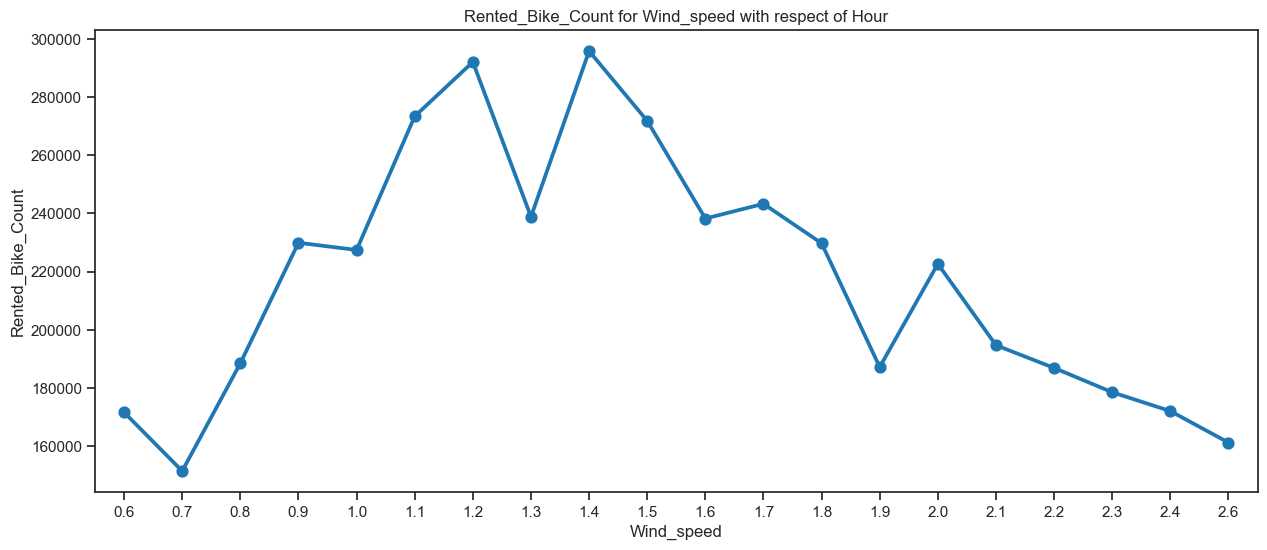

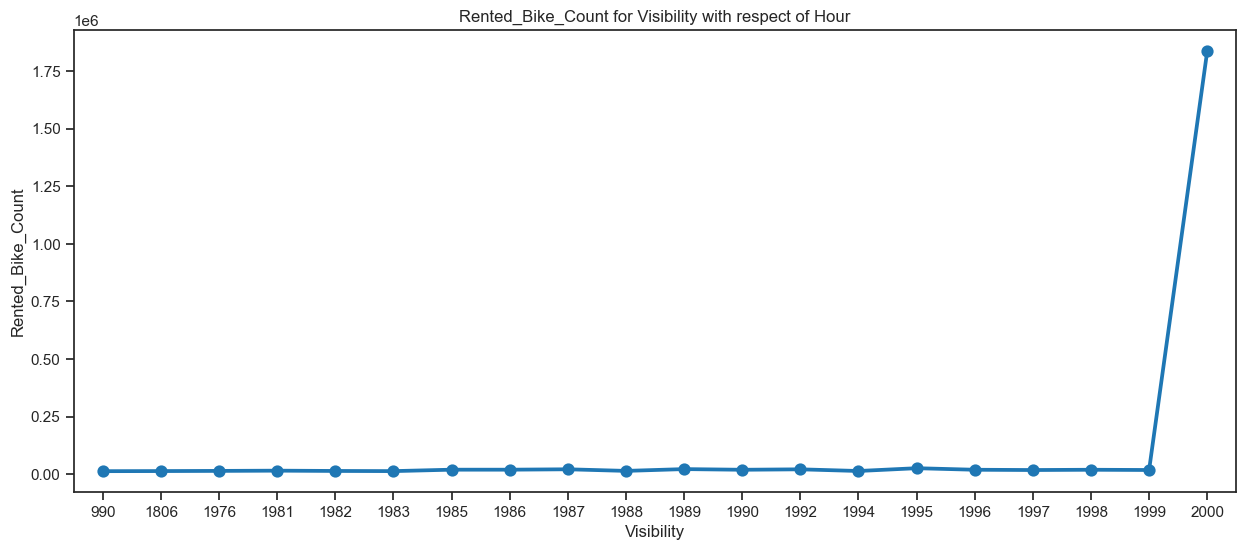

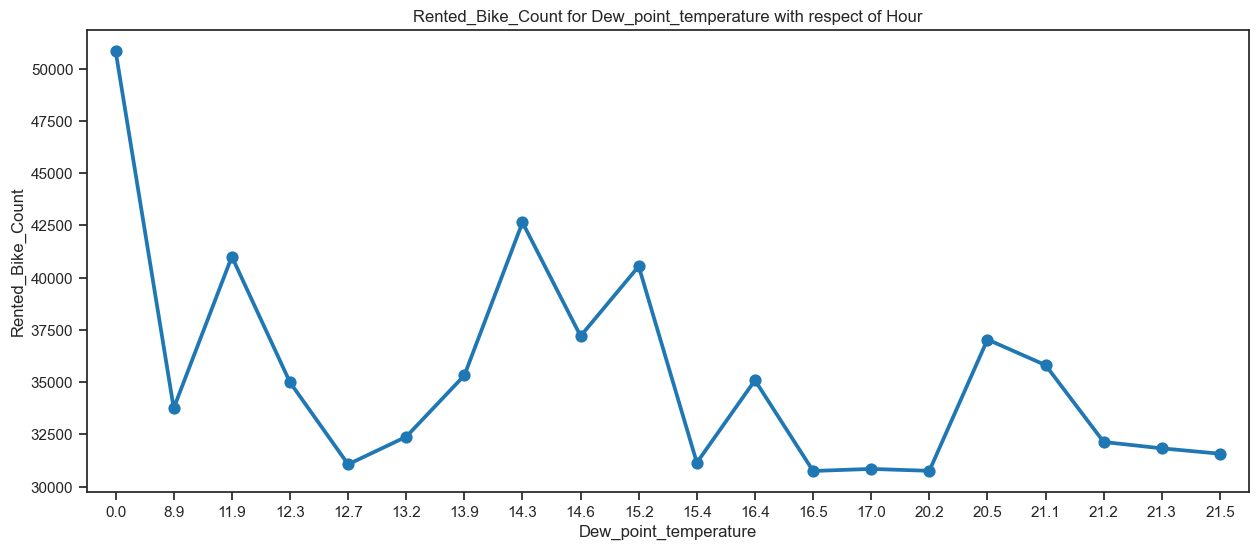

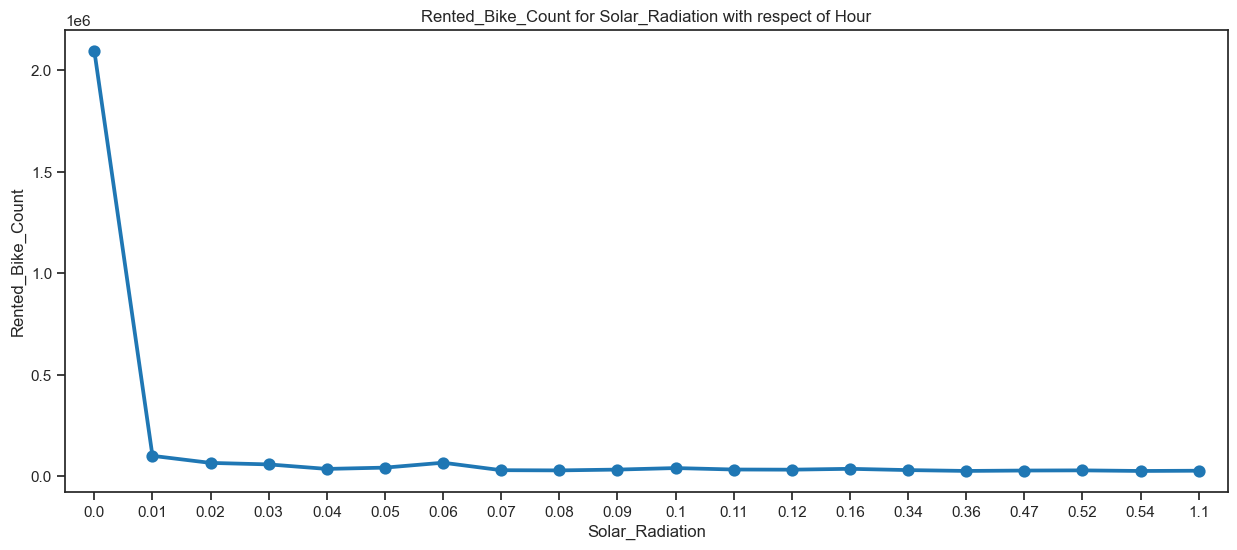

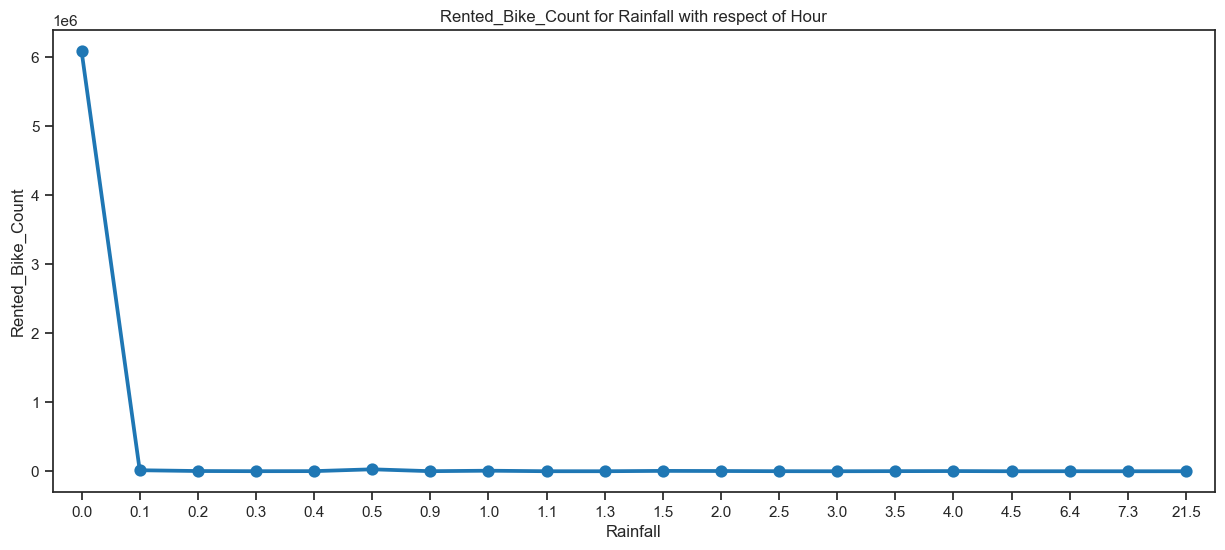

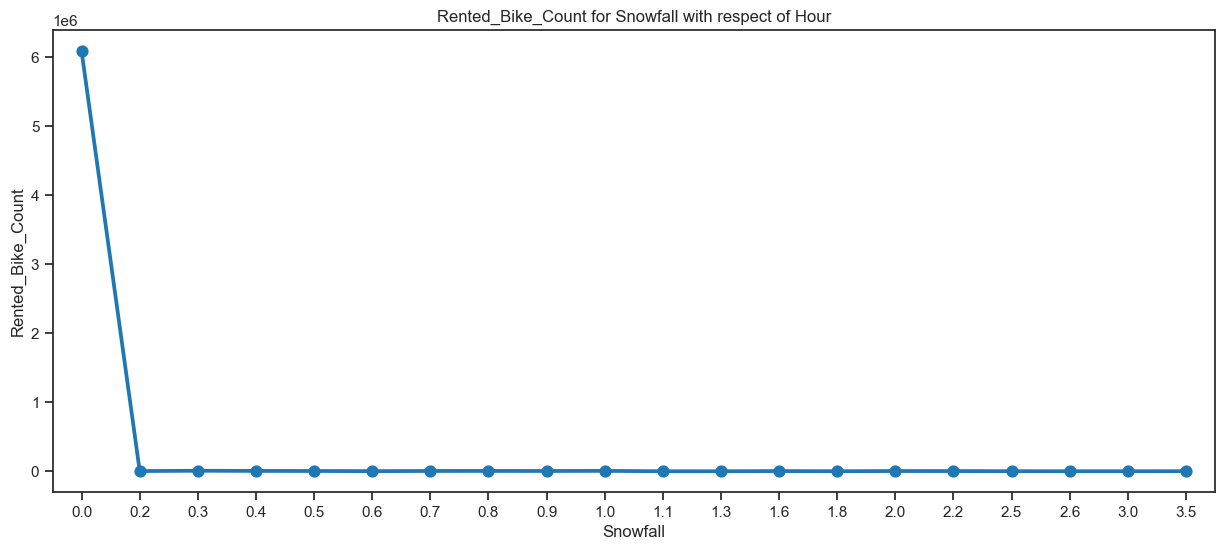

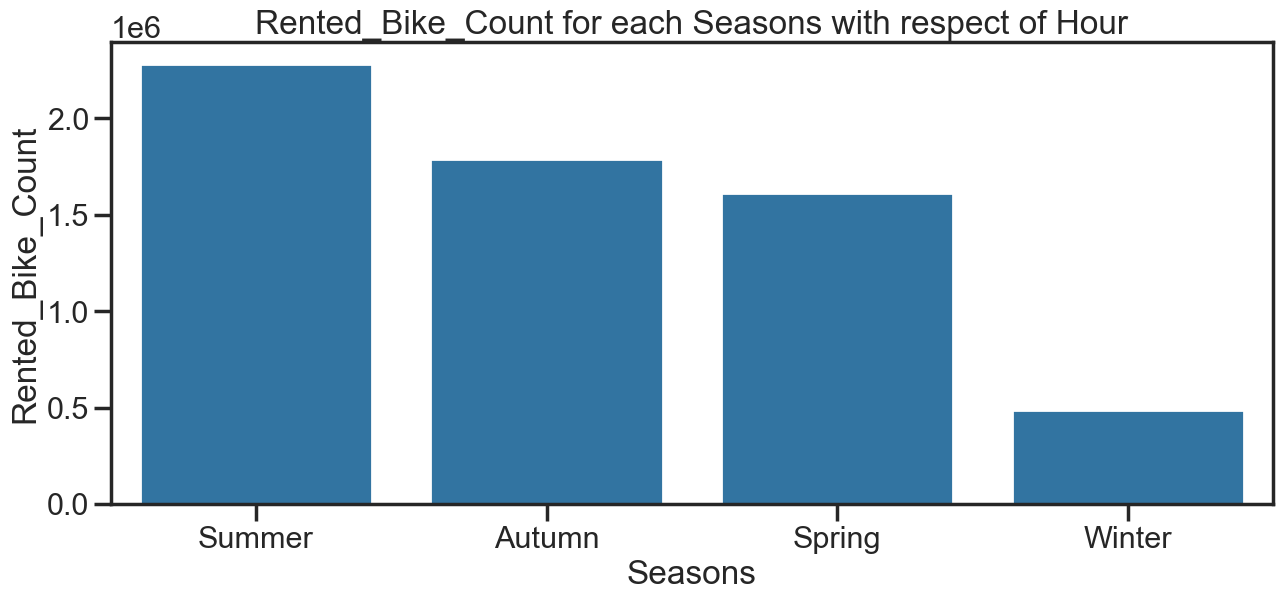

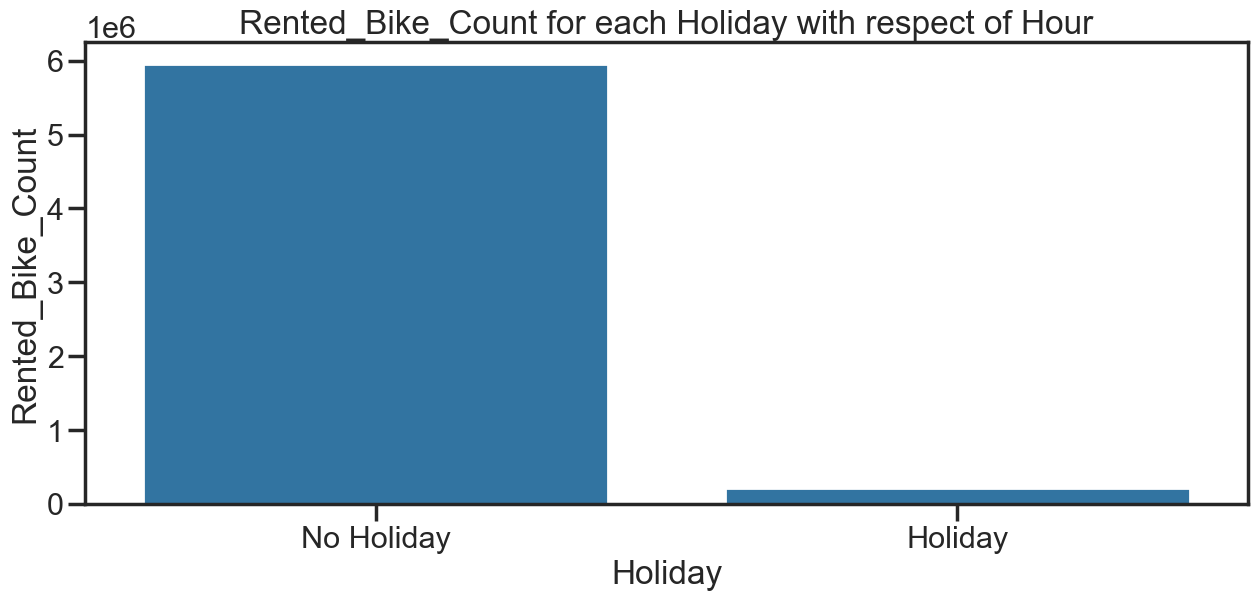

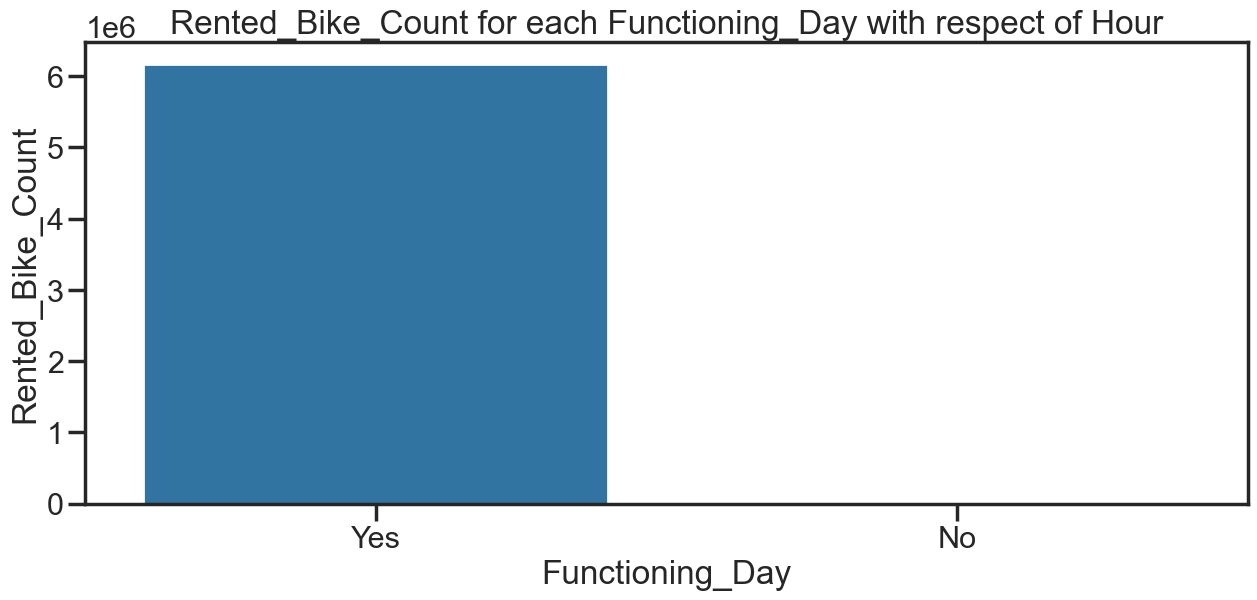

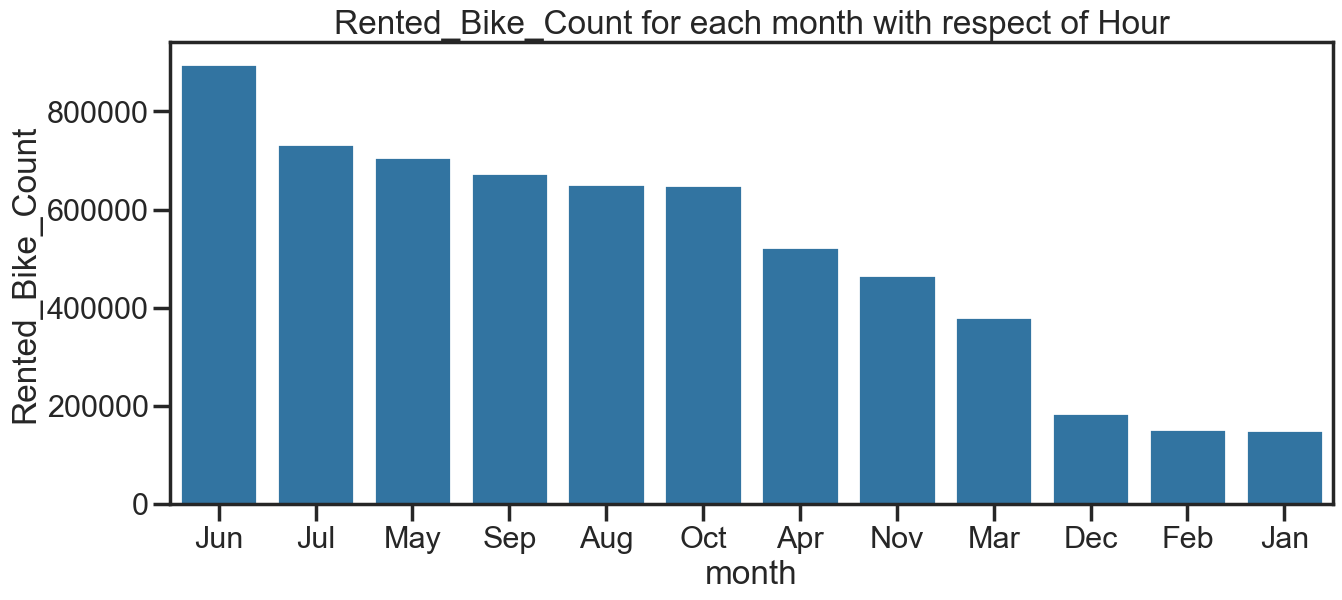

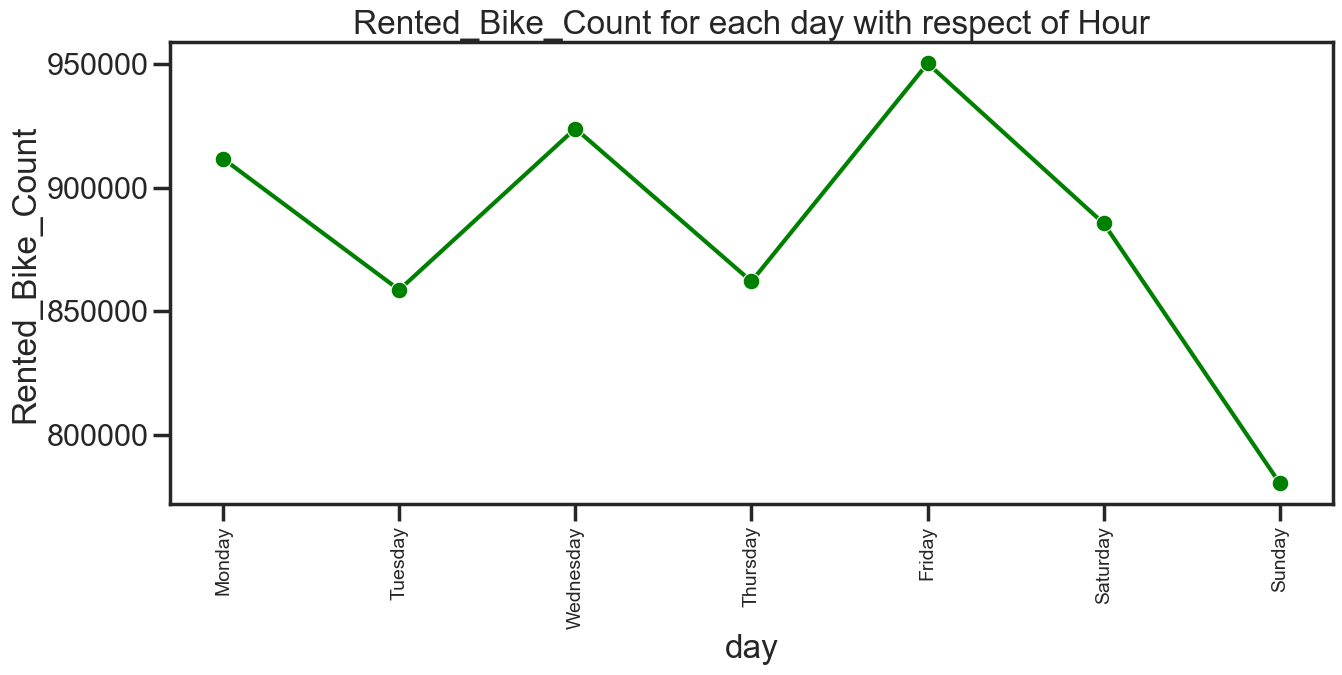

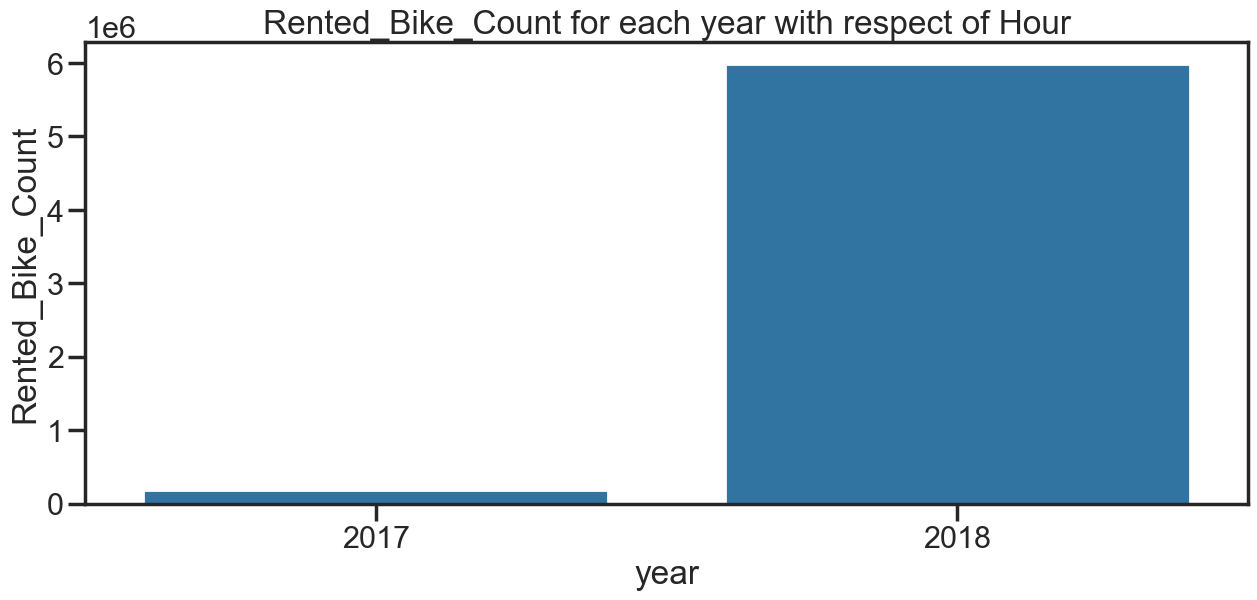

In [344]:
#comparing different feature with bike count 
for i in dfr.columns:
  plt.figure(figsize=(15,6))
  if i == 'Rented_Bike_Count':
    pass
  elif i in ['Seasons','Holiday','Functioning_Day','month','year']:
    grp = dfr.groupby([i], as_index = False)['Rented_Bike_Count'].sum().sort_values('Rented_Bike_Count',
                                                                                    ascending = False)
    sns.set_context('poster');
    sns.barplot(x=grp[i], y=grp["Rented_Bike_Count"]);
    plt.title(f"Rented_Bike_Count for each {i} with respect of Hour");
    print('\n')
  elif i == 'day':
    workingdays = {'day':['Monday','Tuesday','Wednesday','Thursday','Friday',	'Saturday',	'Sunday']}
    workingday = pd.DataFrame(workingdays)
    grp = dfr.groupby([i], as_index = False)['Rented_Bike_Count'].sum().sort_values('Rented_Bike_Count',
                                                                                    ascending = False)
    chart = workingday.merge(grp)
    sns.set_context('poster');
    sns.lineplot(data= chart, x=chart[i],y= chart['Rented_Bike_Count'], marker= 'o', color = 'green');
    plt.xticks(fontsize = 14, rotation = 90);
    plt.title(f"Rented_Bike_Count for each {i} with respect of Hour");
  else :
    grp = dfr.groupby([i], as_index = False)['Rented_Bike_Count'].sum().sort_values('Rented_Bike_Count',
                                                                                    ascending = False).head(20)
    sns.set_context('notebook');
    sns.pointplot(x=grp[i], y=grp["Rented_Bike_Count"]);
    plt.title(f"Rented_Bike_Count for {i} with respect of Hour");
    print('\n')

  plt.show()

* For features like year, Functioning_Day, holiday and season, it can be categorised as 2 or 4 category. Therefore, it is better to check their values again separately, specially with Functioning_Day and holiday. 

In [345]:
#groupby function for finding sum with respect to categorial features
def group_by(df,feature):
  data = df.groupby([feature], as_index = False)['Rented_Bike_Count'].sum().sort_values('Rented_Bike_Count', ascending = False)
  return data

In [346]:
#Rented_Bike_Count with respect to Functioning_Day
group_by(dfr,'Functioning_Day')

Functioning_Day  Rented_Bike_Count
1             Yes            6172314
0              No                  0

In [347]:
#Rented_Bike_Count vs holiday
group_by(dfr,'Holiday')

Holiday  Rented_Bike_Count
1  No Holiday            5956419
0     Holiday             215895

In [348]:
#Rented_Bike_Count with respect to year
group_by(dfr,'year')

year  Rented_Bike_Count
1  2018            5986984
0  2017             185330

In [349]:
#Rented_Bike_Count with respect to season
group_by(dfr,'Seasons')

Seasons  Rented_Bike_Count
2  Summer            2283234
0  Autumn            1790002
1  Spring            1611909
3  Winter             487169

In [350]:
#Rented_Bike_Count with respect to day
weekend = group_by(dfr,'day')
chutti = weekend[(weekend['day'] == 'Saturday') | (weekend['day'] == 'Sunday')]
chutti

day  Rented_Bike_Count
2  Saturday             885492
3    Sunday             780194

In [351]:
#Rented_Bike_Count with respect to day
workingday = group_by(dfr,'day')
office = workingday[(workingday['day'] != 'Saturday') & (workingday['day'] != 'Sunday')]
office

day  Rented_Bike_Count
0     Friday             950334
6  Wednesday             923956
1     Monday             911743
4   Thursday             861999
5    Tuesday             858596

In [352]:
#checking total bike rented count of workingday vs weekend
d = office['Rented_Bike_Count'].sum() > chutti['Rented_Bike_Count'].sum()
print(f' Is it true that bike rented count is more on working day? {d}')

 Is it true that bike rented count is more on working day? True


* If it is a non Functioning_Day, total bike rented count is zero. Therefore, taking two approach to see which can give better result. First, with taking all values, secondly by removing nonfunctioning day value and then removing entire column. But, before taking any step it is better to find correlation of the column with our target( Rented_Bike_Count) column.

In [353]:
copy_for_future = dfr.copy()
trial = dfr.copy()

In [354]:
#changing yes-1 and no-0 for calculation of correlation
trial['Functioning_Day']= LabelEncoder().fit_transform(trial['Functioning_Day'])

In [355]:
trial['Functioning_Day'].value_counts()

Functioning_Day
1    8465
0     295
Name: count, dtype: int64

In [356]:
# finding correlation between functioning day and rented bike count
corr = trial[['Rented_Bike_Count','Functioning_Day']].corr()
corr

Rented_Bike_Count  Functioning_Day
Rented_Bike_Count              1.000            0.204
Functioning_Day                0.204            1.000

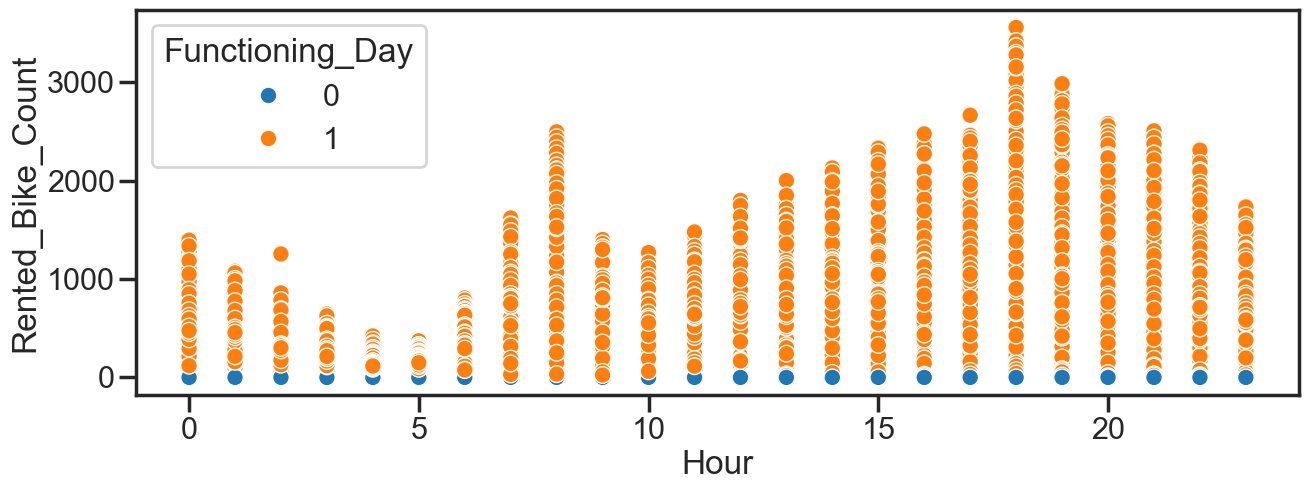

In [357]:
#plotting scatter plot for rented bike count and functioning day
plt.figure(figsize = (15,5));
sns.scatterplot(data = trial[['Rented_Bike_Count','Hour','Functioning_Day']], x = trial['Hour'], y = trial['Rented_Bike_Count'], hue = trial['Functioning_Day']);

* 0 - No functional day
* 1 - Functioning day

**Hence from correlation, it is clear that functioning day show very [low positive](https://https://www.scribbr.com/statistics/pearson-correlation-coefficient/) **correlation** of only **0.2**, therefore will approaching the second method i.e., deleting the non functioning values and then delecting the column.**

In [358]:
#Removing data of non functional days with no rented bike
value = dfr.drop(dfr[dfr['Functioning_Day'] == 'No'].index)

In [359]:
value['Functioning_Day'].value_counts()

Functioning_Day
Yes    8465
Name: count, dtype: int64

In [360]:
#Removing entire functional day column as it of no use
value = value.drop(['Functioning_Day'], axis = 1)
value.shape

(8465, 15)

In [361]:
#shape of new dataset 
print(f'Shape of original data: {copy_for_future.shape}')
print(f'Shape of new data : {value.shape}')

Shape of original data: (8760, 16)
Shape of new data : (8465, 15)


In [362]:
value.head()

Rented_Bike_Count Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254    0       -5.200        37       2.200        2000   
1                204    1       -5.500        38       0.800        2000   
2                173    2       -6.000        39       1.000        2000   
3                107    3       -6.200        40       0.900        2000   
4                 78    4       -6.000        36       2.300        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                -17.600            0.000     0.000     0.000  Winter   
1                -17.600            0.000     0.000     0.000  Winter   
2                -17.700            0.000     0.000     0.000  Winter   
3                -17.600            0.000     0.000     0.000  Winter   
4                -18.600            0.000     0.000     0.000  Winter   

      Holiday month     day  year  
0  No Holiday   Dec  Friday  2017  
1  No Holiday   Dec  Friday  2017  
2  No Holiday   Dec  Friday  2017  
3  No Holiday   Dec  Friday  2017  
4  No Holiday   Dec  Friday  2017

In [363]:
df.shape

(8760, 16)

* From the above graph and analysis, it can be stated that 
  1. If it is a non Functioning_Day, Rented_Bike_Count is zero.
  2. As seson changes from summer to winter, demand for bike decreases.
  3. Above point is also proved when month is plotted against bike demand, it is observed that demand gradually decreased as we moved from summer to winter and has lowest demand in Febuary.
  4. Bike demand on holiday is less than that on working day.
  5. Every week demand for bike gradually increases, however on weekend, one can see a less amount of demand, which further can help us in categorizing day as workingday and weekend.


In [364]:
# Converting day of weeks in Two variable from Monaday to Friday in workingdays and Saturday and Sunday to Weekend
value['week'] = value['day'].apply(lambda x:'Weekend'  if x=='Saturday' or  x== 'Sunday' else 'workingdays')

In [365]:
value.week.value_counts()

week
workingdays    6024
Weekend        2441
Name: count, dtype: int64

In [366]:
value.head()

Rented_Bike_Count Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254    0       -5.200        37       2.200        2000   
1                204    1       -5.500        38       0.800        2000   
2                173    2       -6.000        39       1.000        2000   
3                107    3       -6.200        40       0.900        2000   
4                 78    4       -6.000        36       2.300        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                -17.600            0.000     0.000     0.000  Winter   
1                -17.600            0.000     0.000     0.000  Winter   
2                -17.700            0.000     0.000     0.000  Winter   
3                -17.600            0.000     0.000     0.000  Winter   
4                -18.600            0.000     0.000     0.000  Winter   

      Holiday month     day  year         week  
0  No Holiday   Dec  Friday  2017  workingdays  
1  No Holiday   Dec  Friday  2017  workingdays  
2  No Holiday   Dec  Friday  2017  workingdays  
3  No Holiday   Dec  Friday  2017  workingdays  
4  No Holiday   Dec  Friday  2017  workingdays

#### **Multivariate Analysis**

In [367]:
#getting categorial values
cat_feature = value.select_dtypes(include='object')

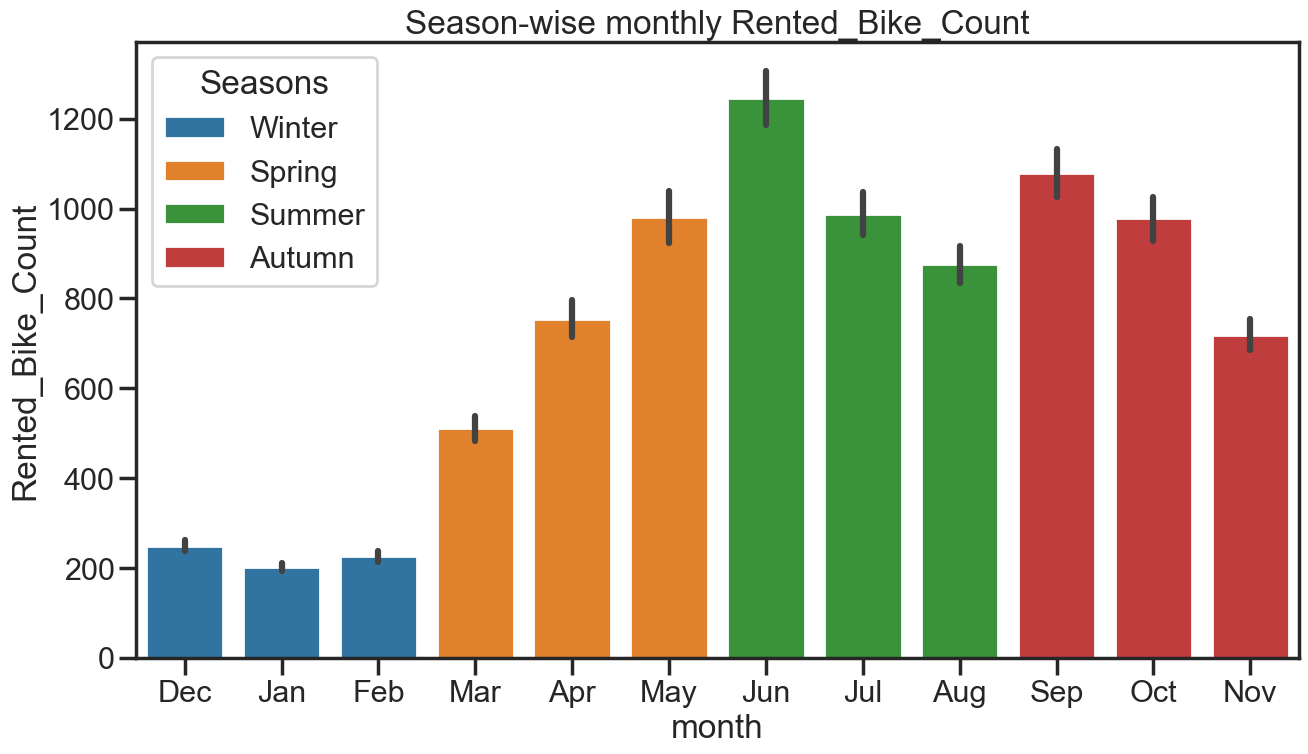

In [368]:
#Bar plot for seasonwise monthly distribution of Rented_Bike_Count
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(x='month',y='Rented_Bike_Count',data=value, hue='Seasons',ax=ax);
ax.set_title('Season-wise monthly Rented_Bike_Count');
plt.show();

* If two variable or features show relationship either in same or opposite direction, then these variables thus show correlation between them. 
* Feature like **Temperature**(°C) and **Dew point temperature**(°C) **show** correlation and in general, an **absolute correlation coefficient** of **>0.7** among two or more predictors indicates the presence of  **multicollinearity**.
* Without functioning day column it shows better correlation.

### **CONCLUSION**

* From the above EDA, these are some conclusions:
  
  1. Features like Rented_Bike_Count, Wind_speed and Solar Radiation(MJ/m2) shows positive skewness.
  2. Feature visibility(10m) shows negative skewness.
  3. Demand for bike is more during moring and evening mostly around 7-9 in morning and 6-8 in evening.
  4. Demand for bike is more during working days than on weekend.
  5. Demand for bike is zero on non functional day.
  6. Demand of bike is less on holiday.
  7. Demand of bike is more during summer than in winter.

## **Feature Engineering**

### **Outliers**

In [369]:
#checking outliers using box plot
def box_plot(df,feature):
  i=1
  for col in feature.columns :
    plt.figure(figsize = (20,40))
    plt.subplot(5,2,i);
    i=i+1
    if df[col].dtypes == 'object': # If the column contains categories/strings → treat it differently.
      sns.boxplot(x=df[col],y=df["Rented_Bike_Count"]);
      print('\n')
    else:
      sns.boxplot(df[col]);
      print('\n')
    plt.xticks(fontsize = 15, rotation = 90);
    plt.yticks(fontsize = 15)
    plt.tight_layout();

In [370]:
cat_feature = value.select_dtypes(include ='object')

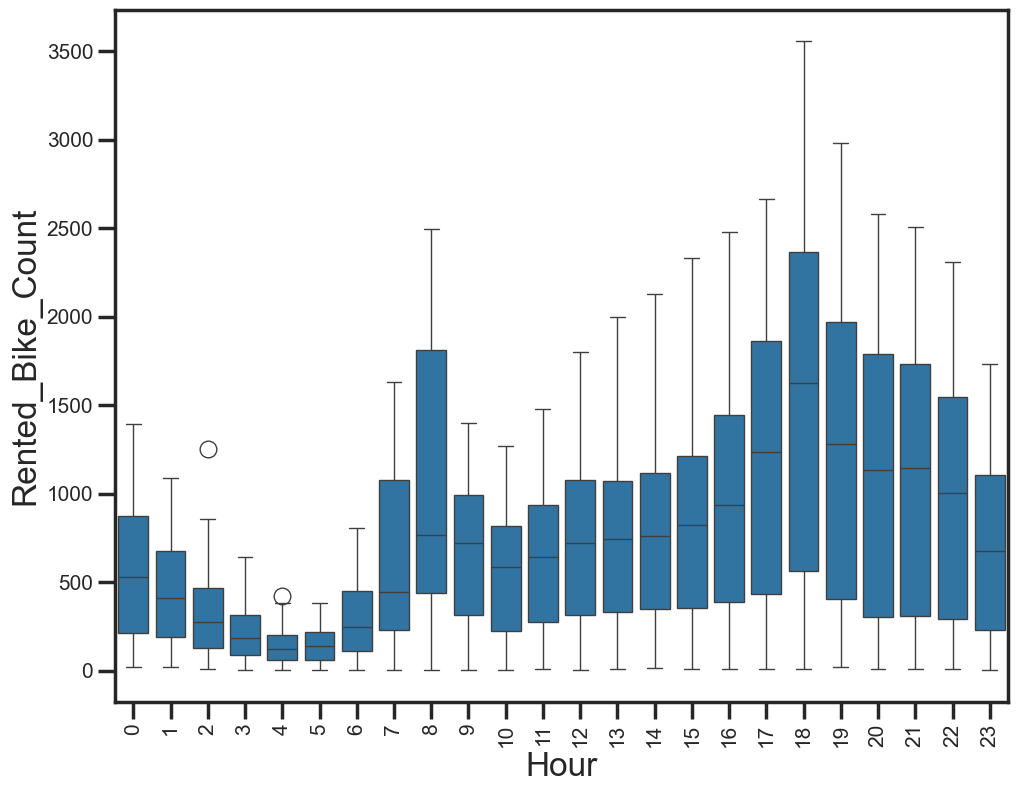

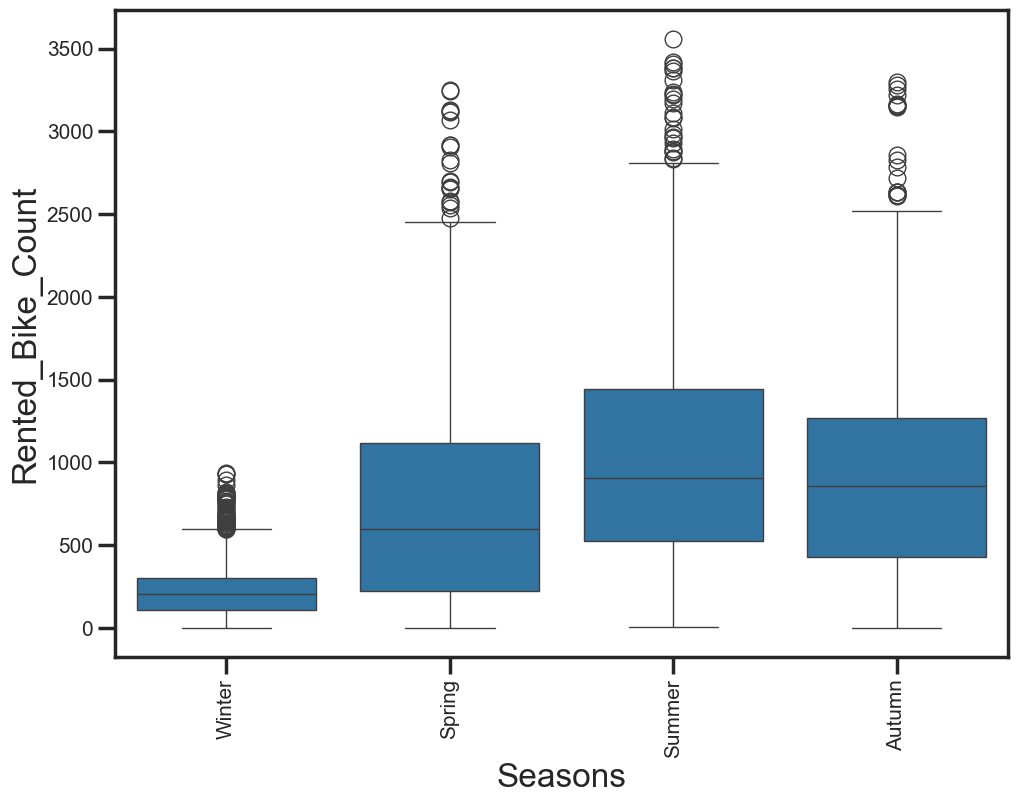

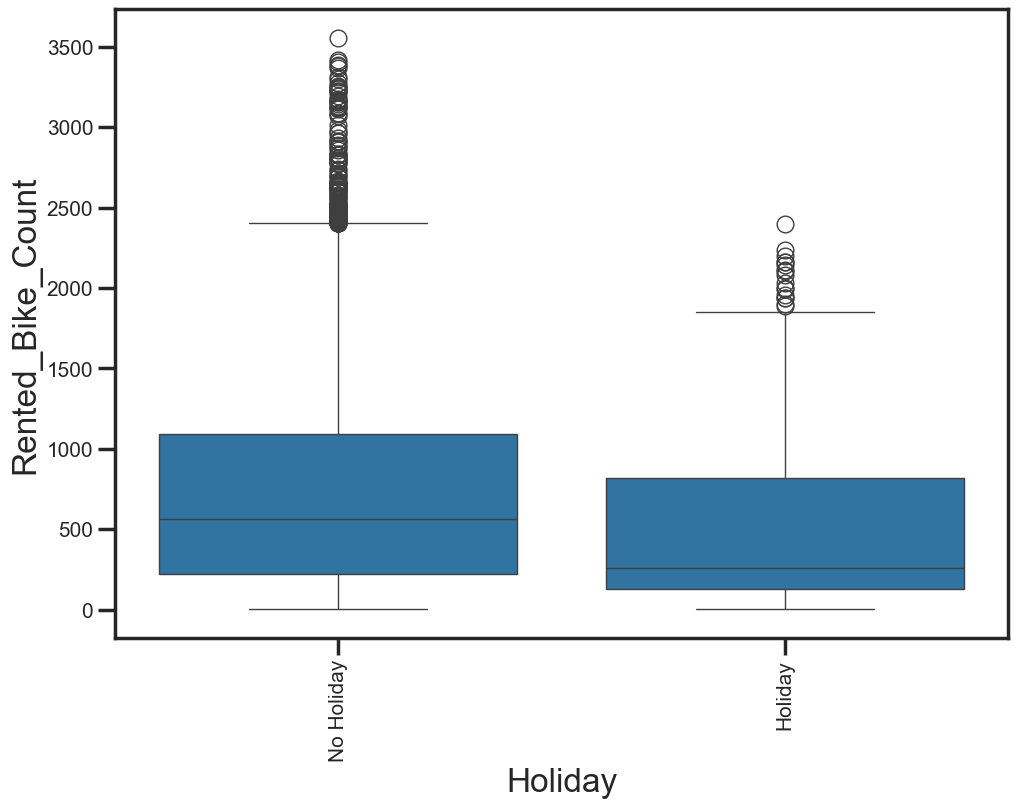

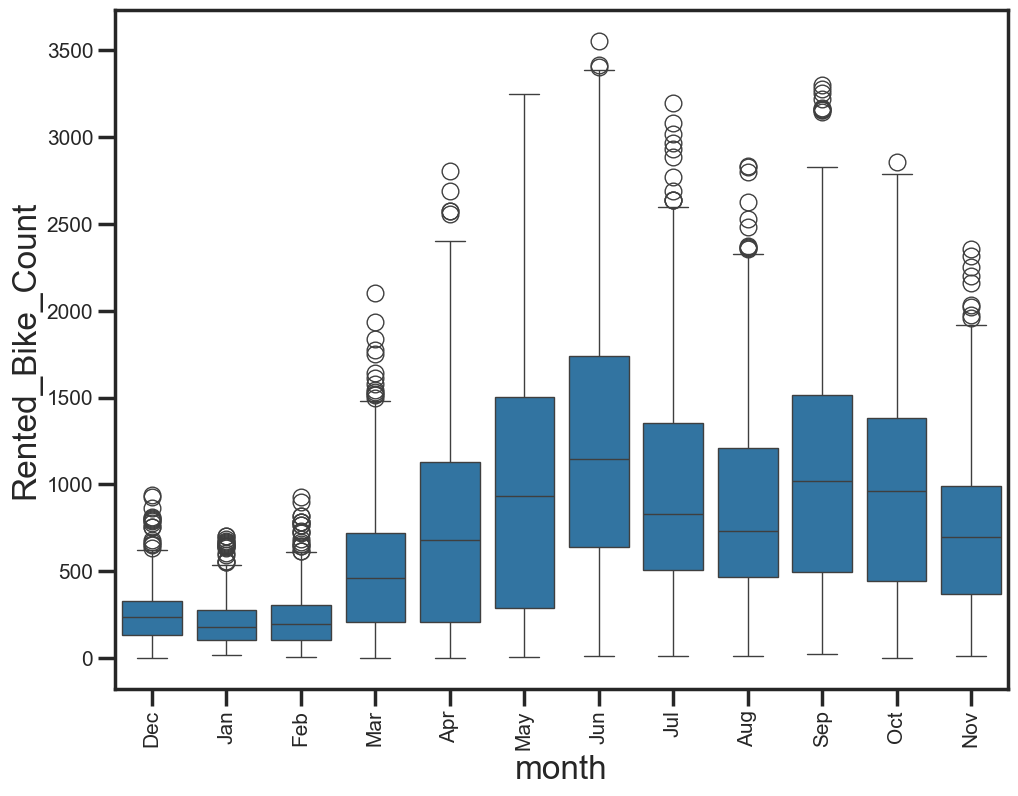

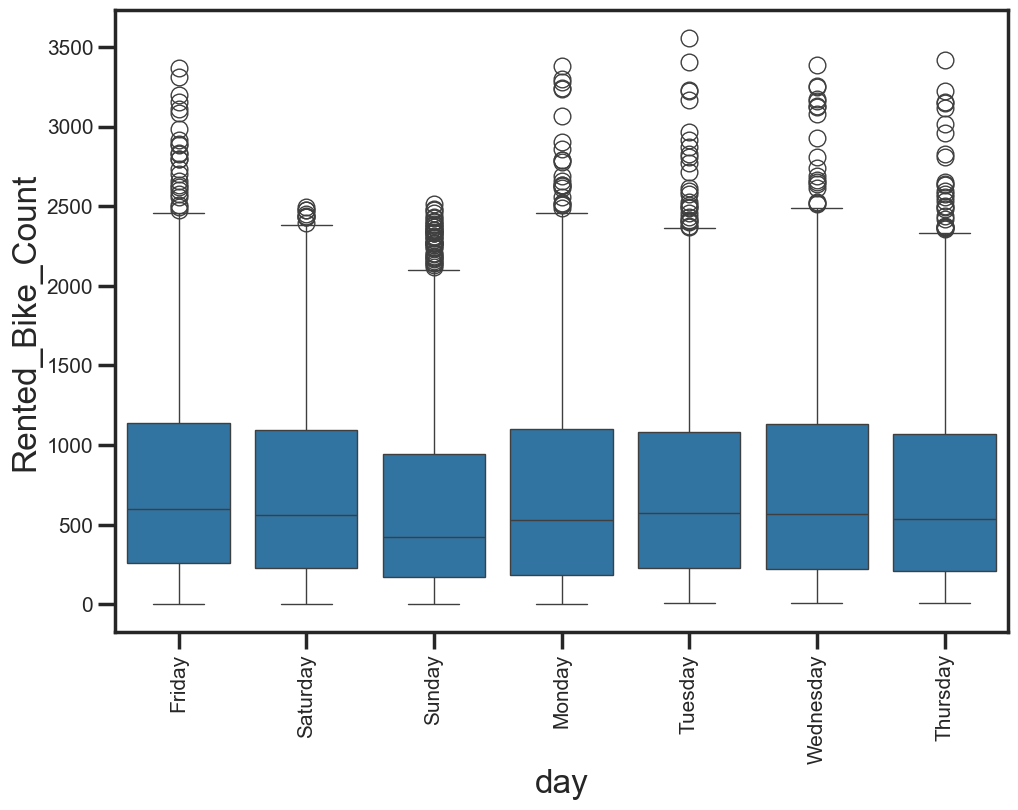

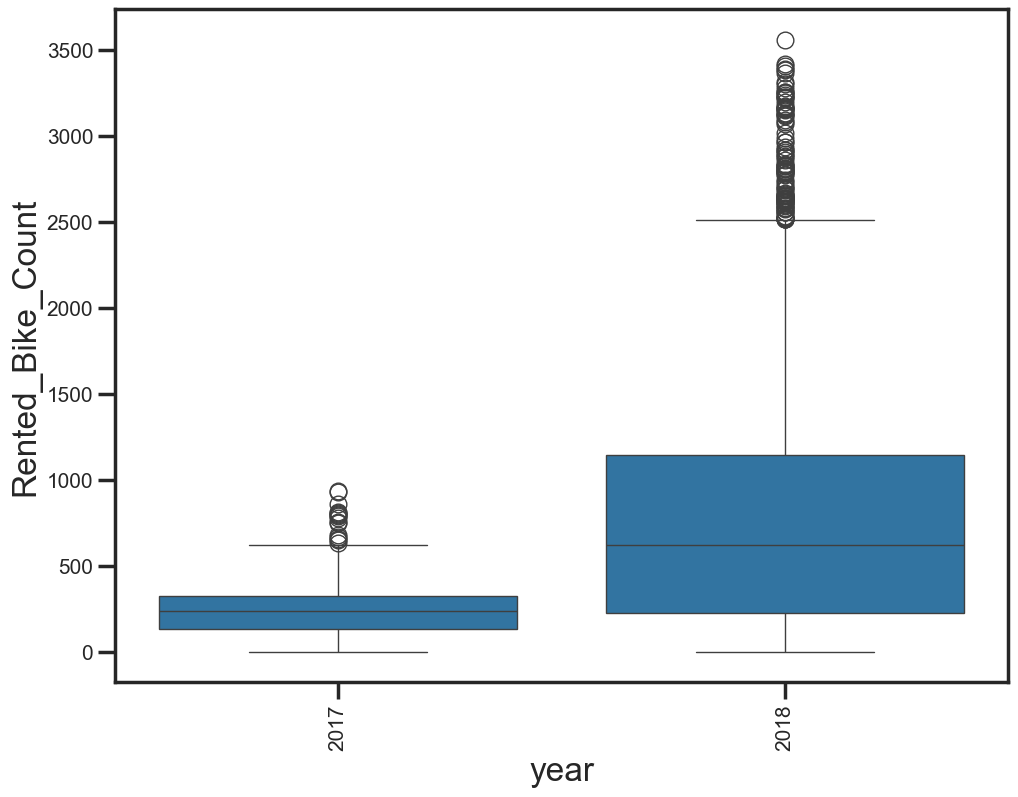

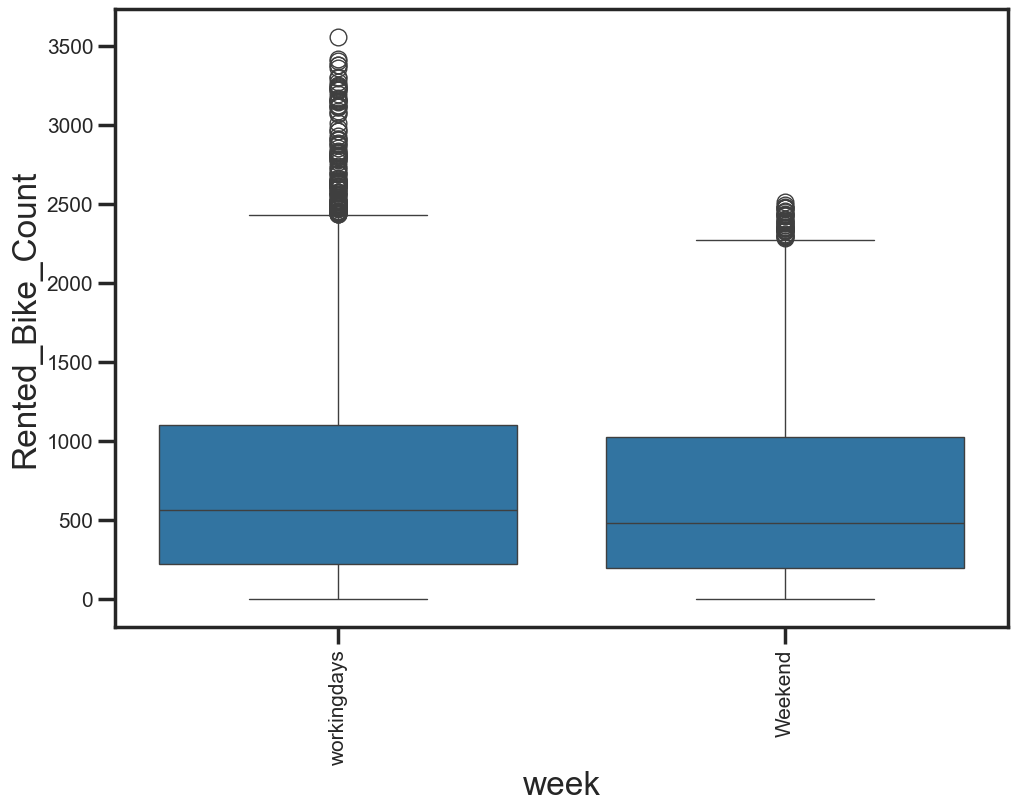

In [371]:
box_plot(value,cat_feature)

1. Hourly boxplots showed strong peaks at commuting hours, with naturally larger variability and a few realistic outliers in early morning hours.
2. I found several outliers in Spring, Summer, and Autumn. These outliers represent unusually high rental days — for example, weekends, holidays, or exceptionally good weather days.(These outliers are not errors but meaningful extreme values reflecting sudden spikes in demand.)
3. Holidays actually show lower median bike rentals and a much smaller IQR. This means demand on holidays is both lower and more consistent


In [372]:
num_feature = value.select_dtypes(exclude = 'object')

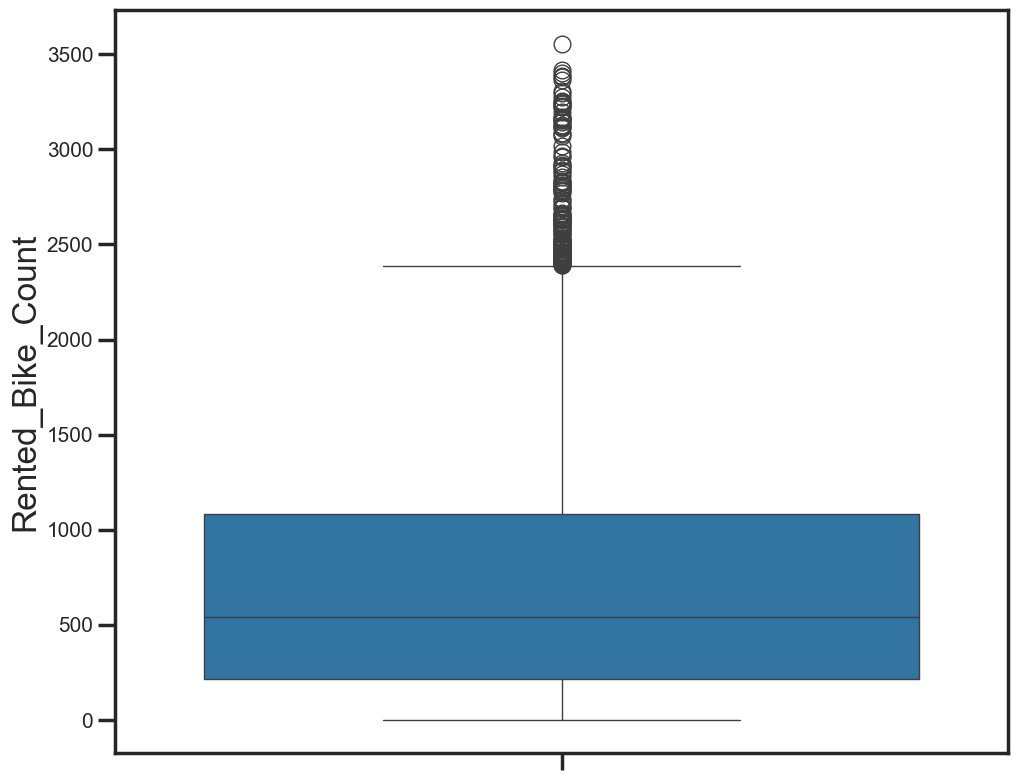

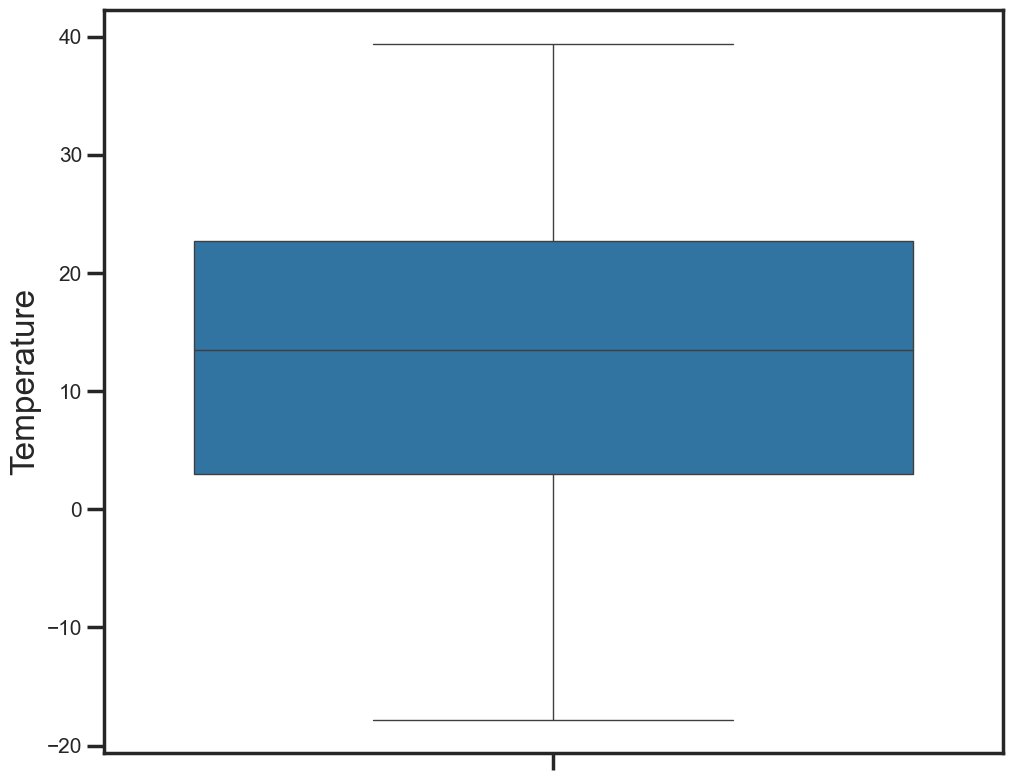

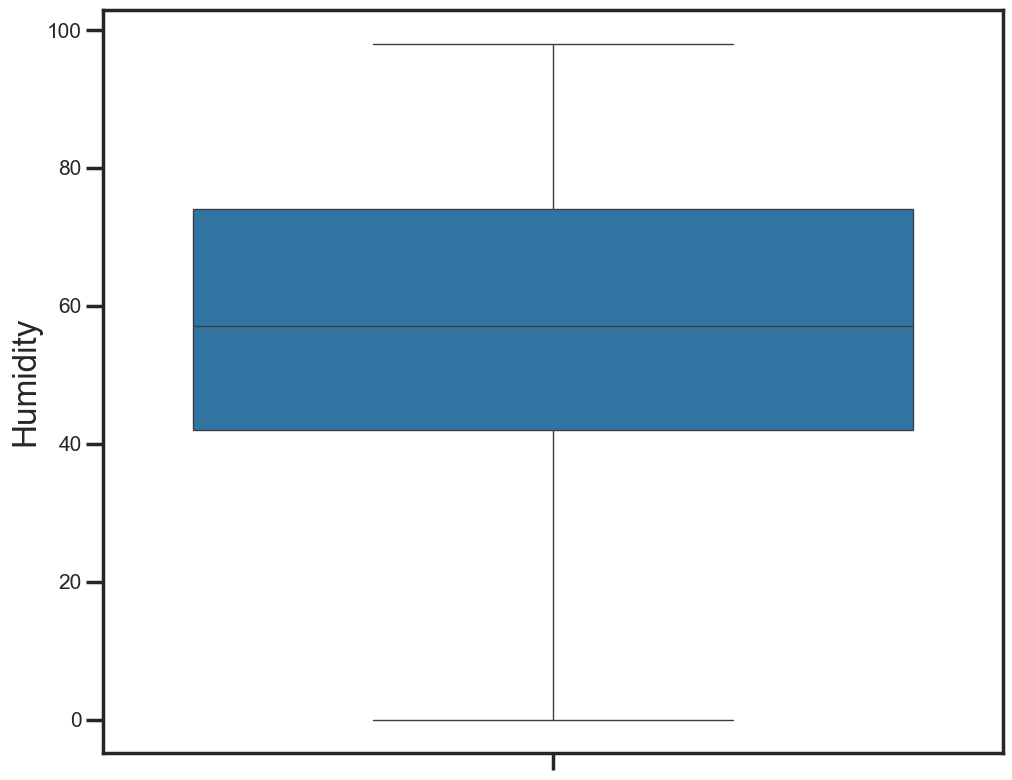

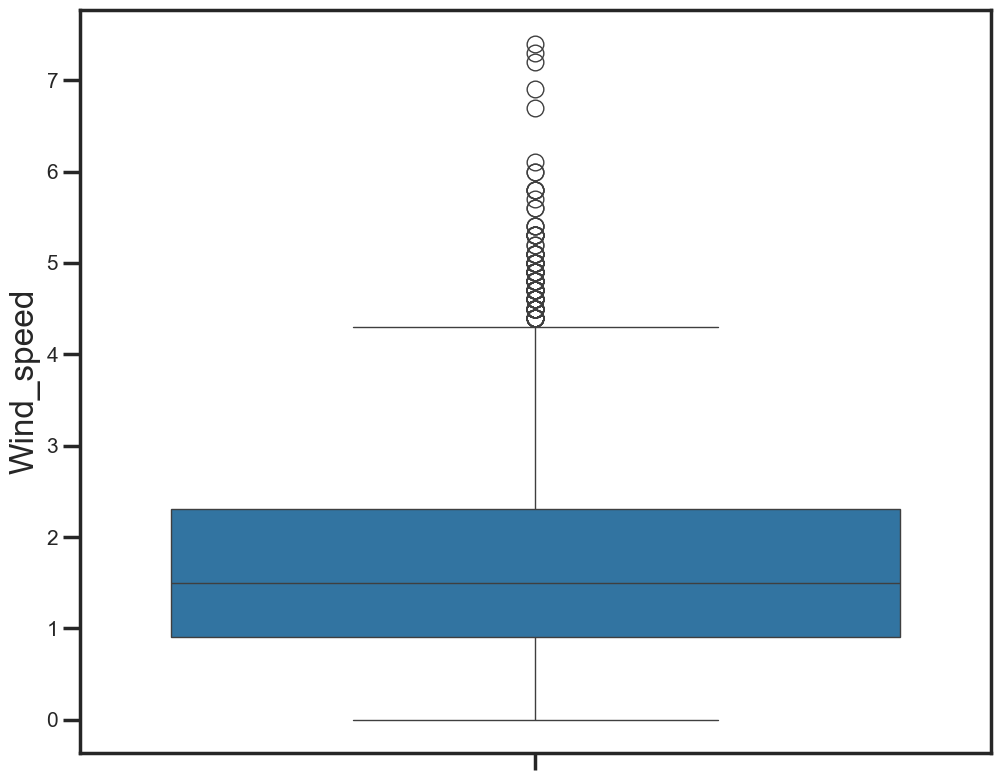

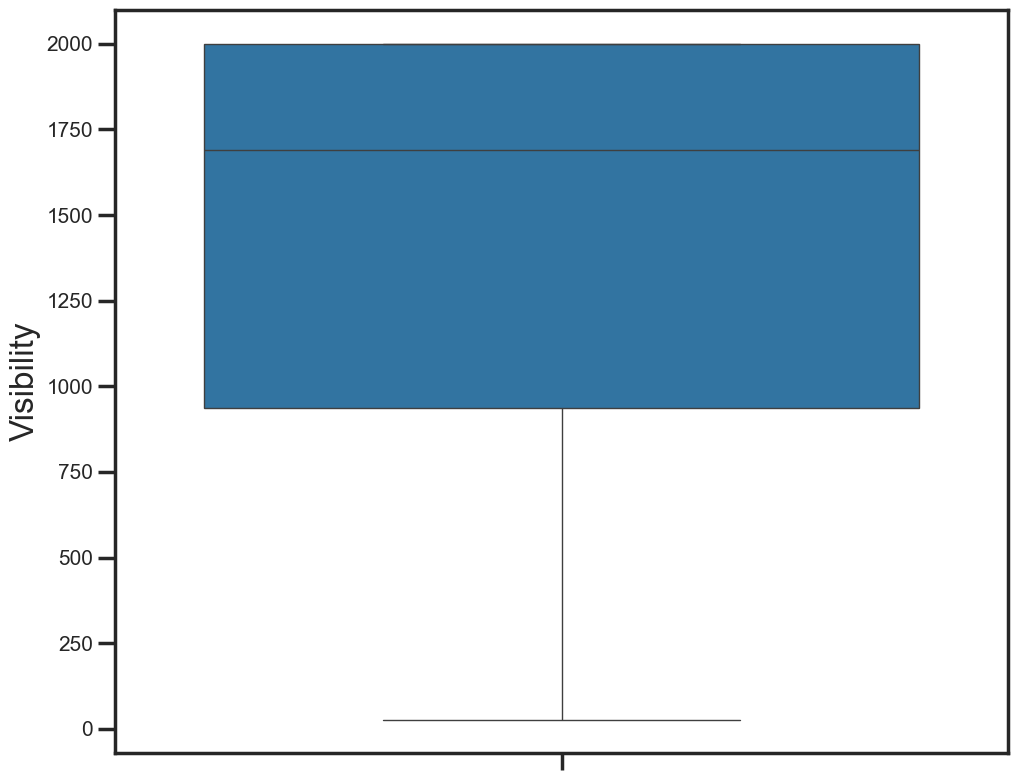

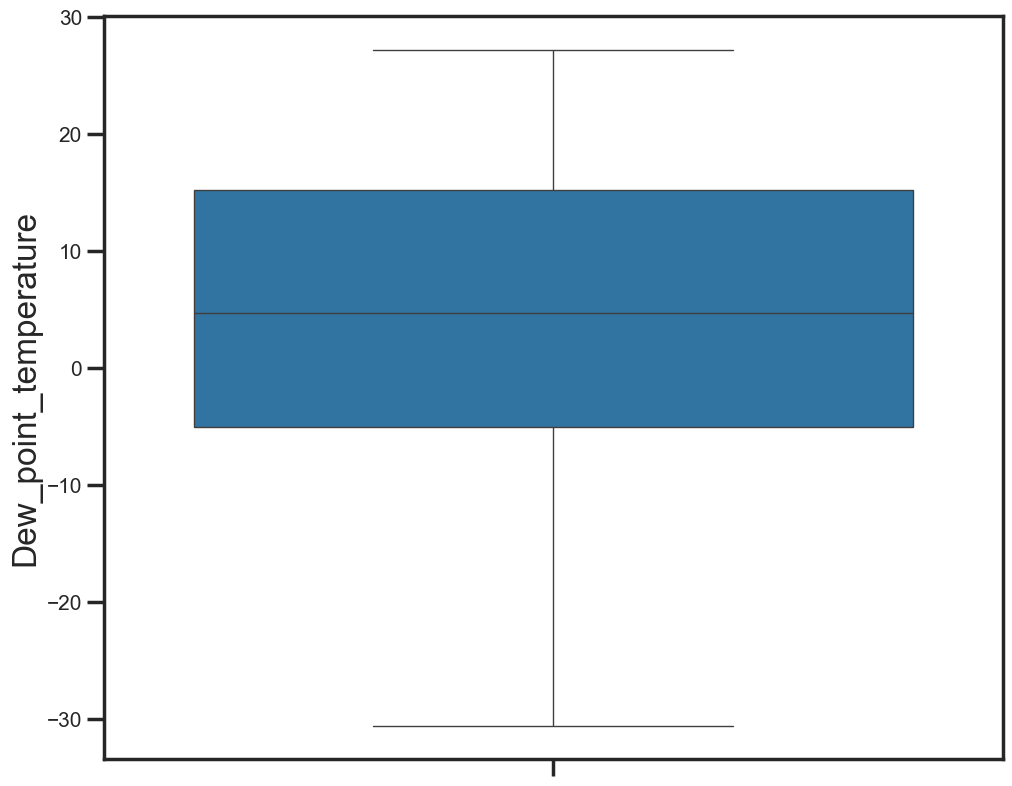

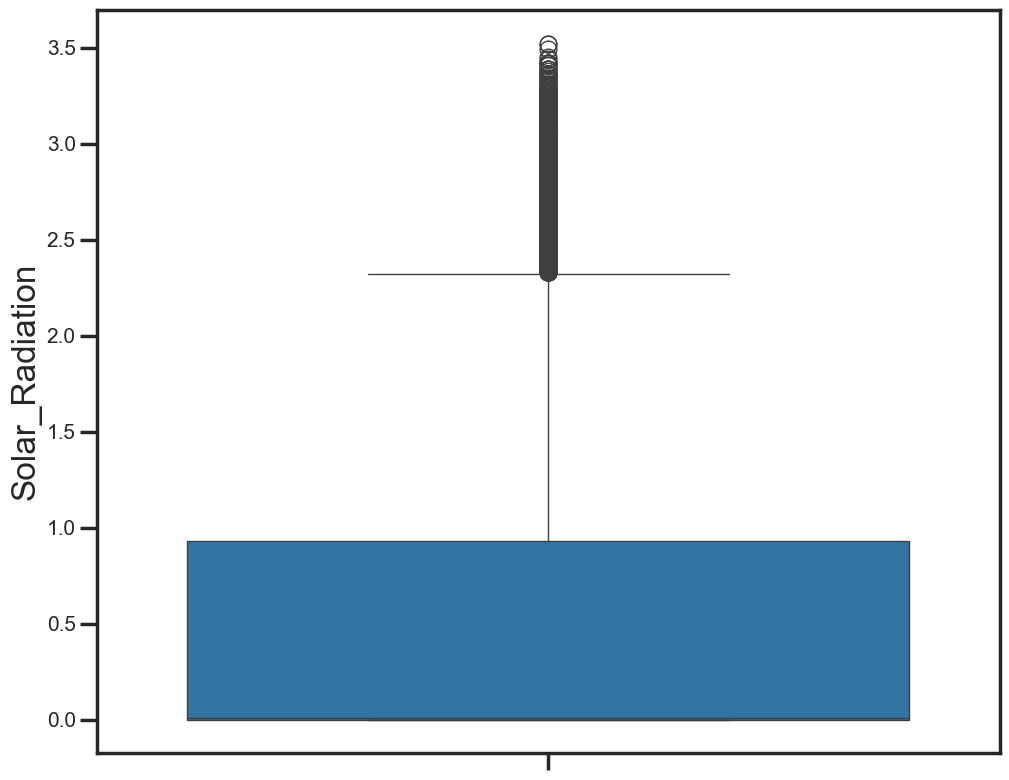

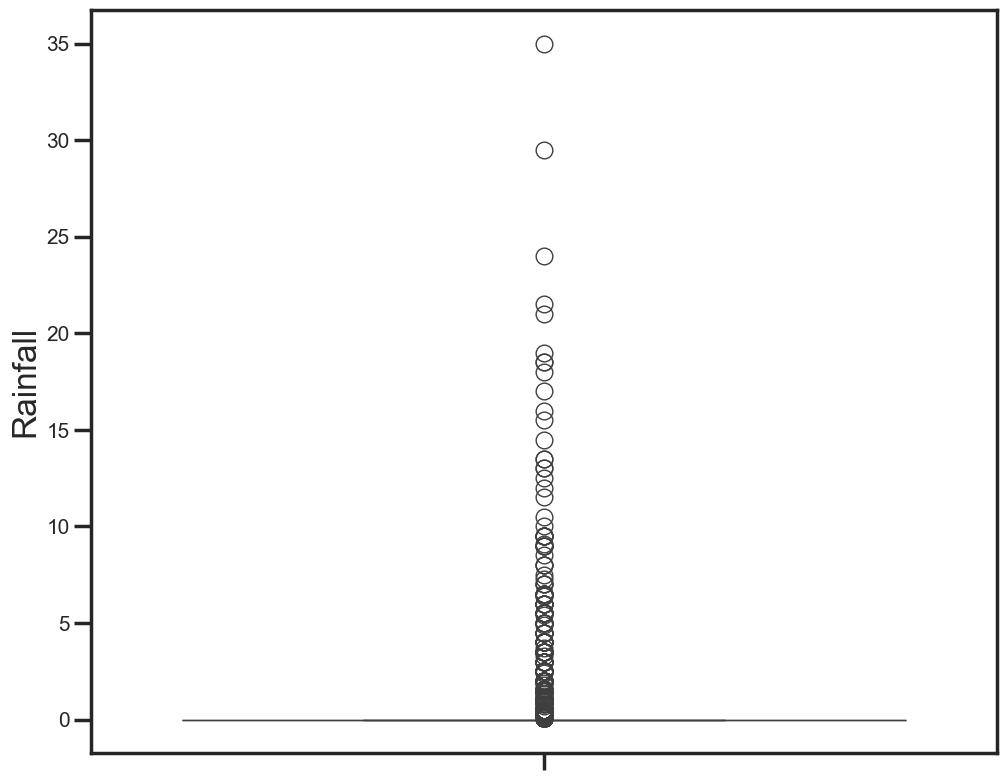

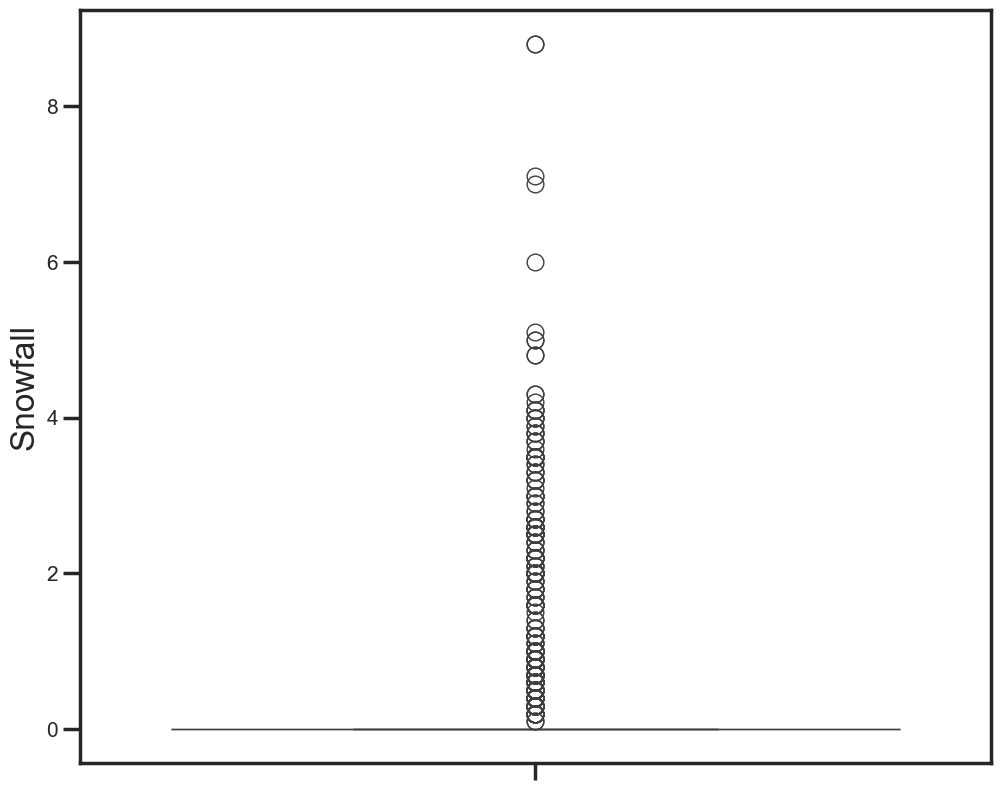

In [373]:
box_plot(value,num_feature)

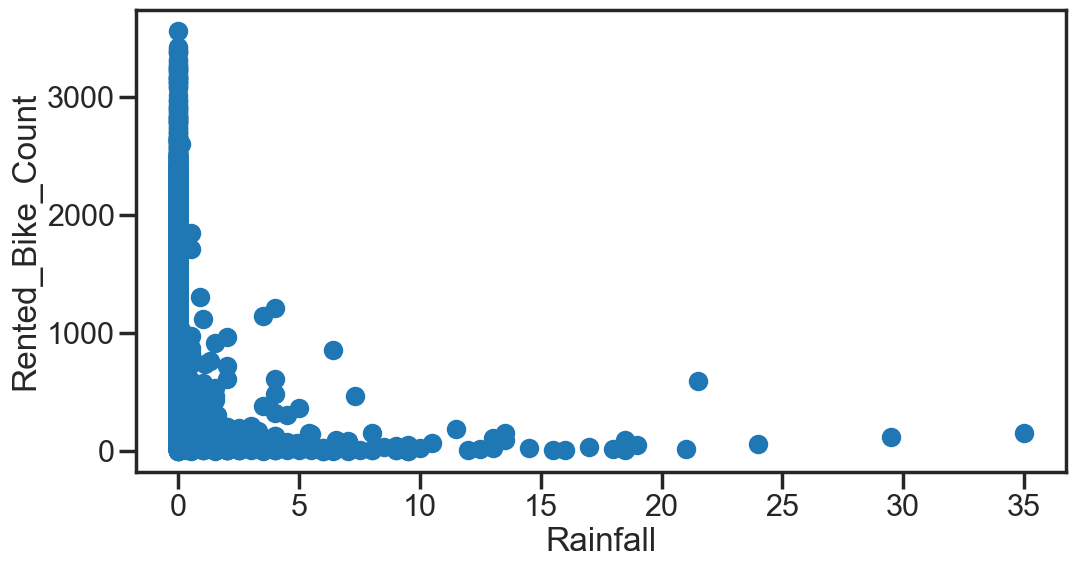

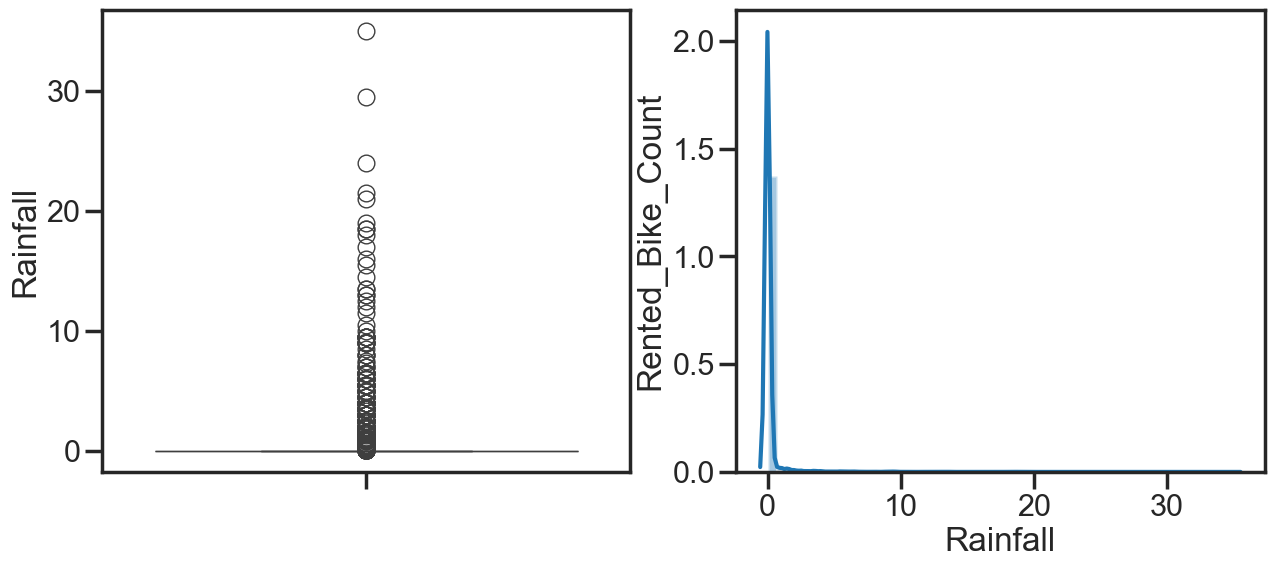

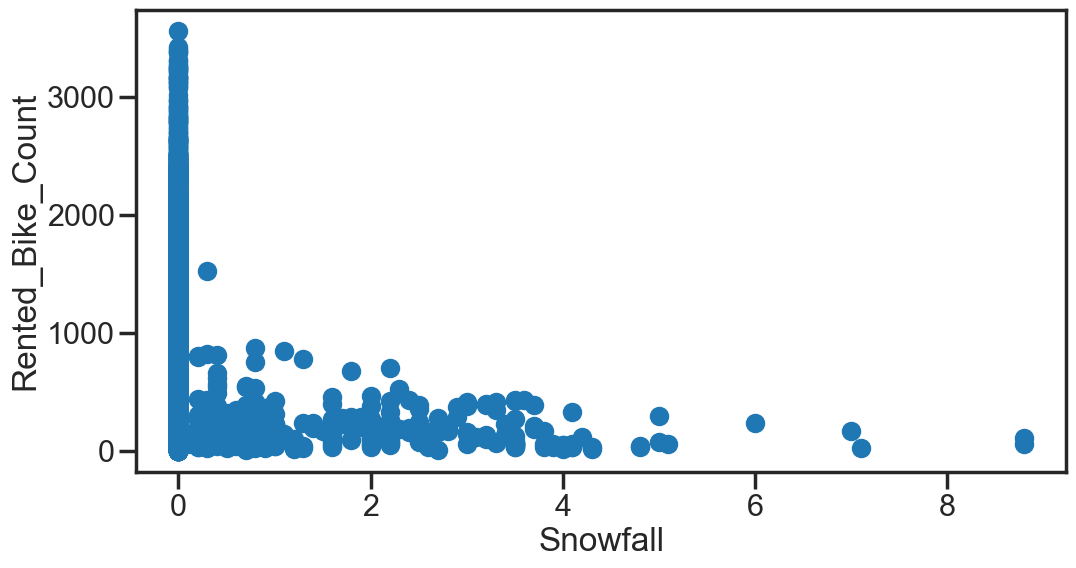

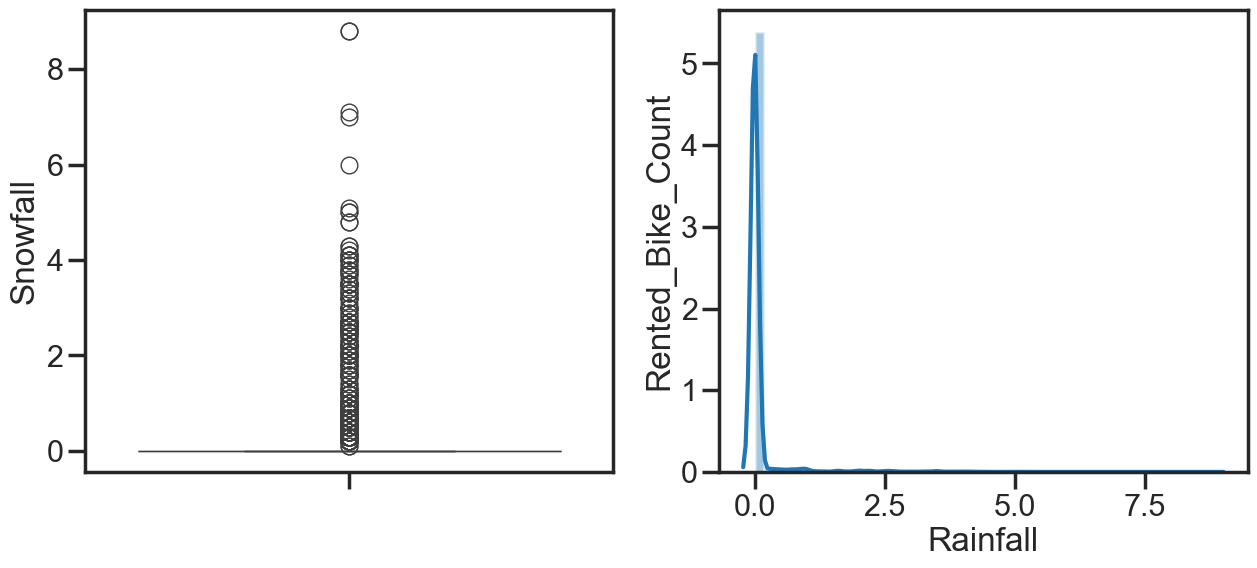

In [374]:
#detecting outliers using scatter plot for snowfall and rainfall
# Scatter plot
for i in ['Rainfall','Snowfall']:
  fig, ax = plt.subplots(figsize = (12,6))
  ax.scatter(value[i], value['Rented_Bike_Count']);

  # x-axis label
  ax.set_xlabel(i);

  # y-axis label
  ax.set_ylabel('Rented_Bike_Count');

  #distribution and box plot
  plt.figure(figsize=(15,6))
  plt.subplot(1, 2, 1)
  fig = sns.boxplot(y=value[i])
  fig.set_title('')
  fig.set_ylabel(i)
      
  plt.subplot(1, 2, 2)
  fig = sns.distplot(value[i].dropna())
  fig.set_ylabel('Rented_Bike_Count')
  fig.set_xlabel("Rainfall")

  plt.show()


* **Z- Score** is also called a standard score. This value/score **helps** to understand that **how far is the data point** **from** the **mean**. And after setting up a threshold value one can utilize **z score** values of data points to **define** the **outliers**.

In [375]:
#function to cap outliers
def remove_outlier(df,feature):
  upper_lim = df[feature].quantile(.95)
  lower_lim = df[feature].quantile(.05)
  df.loc[(df[feature] > upper_lim),feature] = upper_lim
  df.loc[(df[feature] < lower_lim),feature] = lower_lim
  return df[feature]

In [376]:
#making copy for removing ouliers without affecting original
copy = value.copy()

In [377]:
copy[copy['Rainfall'] > 0]['Rainfall'].value_counts()

Rainfall
0.500     114
1.000      64
1.500      55
0.100      44
2.000      30
         ... 
1.900       1
17.000      1
3.700       1
1.400       1
1.800       1
Name: count, Length: 60, dtype: int64

In [378]:
copy['Rainfall']= remove_outlier(copy,'Rainfall')
copy['Snowfall']= remove_outlier(copy,'Snowfall')
copy['Rented_Bike_Count_new'] = remove_outlier(copy,'Rented_Bike_Count')

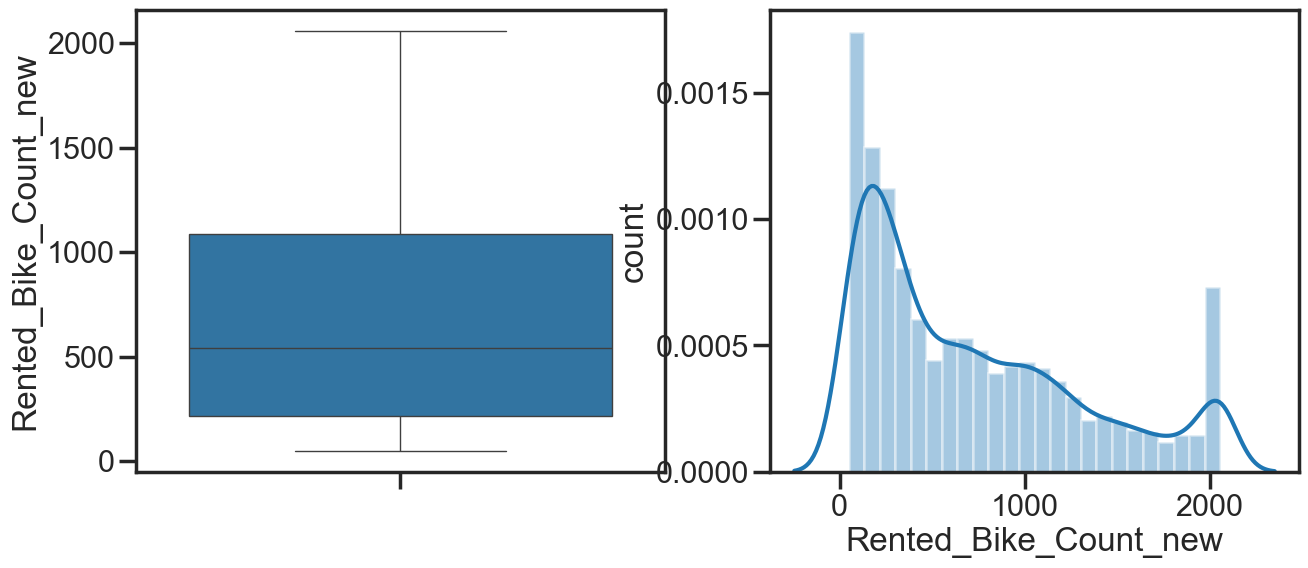

In [379]:
#testing rented bike count after removal of outliers how it worked
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.boxplot(y=copy['Rented_Bike_Count_new'])
fig.set_title('')
fig.set_ylabel("Rented_Bike_Count_new")
    
plt.subplot(1, 2, 2)
fig = sns.distplot(copy['Rented_Bike_Count_new'].dropna())
fig.set_ylabel('count')
fig.set_xlabel("Rented_Bike_Count_new")

plt.show()

In [380]:
copy[copy['Rainfall'] > 0]['Rainfall'].value_counts()

Rainfall
0.500    427
0.100     44
0.200     20
0.400     16
0.300      9
Name: count, dtype: int64

* Ignoring outliers in snowfall and rainfall since if treated will cause entire value to to be distributed as 0.
* Bike Rented Count which is the target valriable, shows positive skewness, therefore will try to use transformation to get better result.

### **Multicollinearity**

---
* Anytime an **independent** variable (feature) has a strong **correlation** with **another independent** variable, that situation is referred to as **multicollinearity**. Although it may not initially appear to be a problem,but as the basic objective of regression analysis is to find correlations between the independent variable and the target variable these features with **high correlation** **can** undoubtedly **introduce** some **errors** into our results.


* In the above heatmap (EDA -multivariate analysis), two feature showed correlation of 0.91 i.e., temperature and dew point temperature.

In [390]:
num_feature = value.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [391]:
print(num_feature)

['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall']


In [392]:
for col in num_feature:
    value[col] = pd.to_numeric(value[col], errors="coerce")


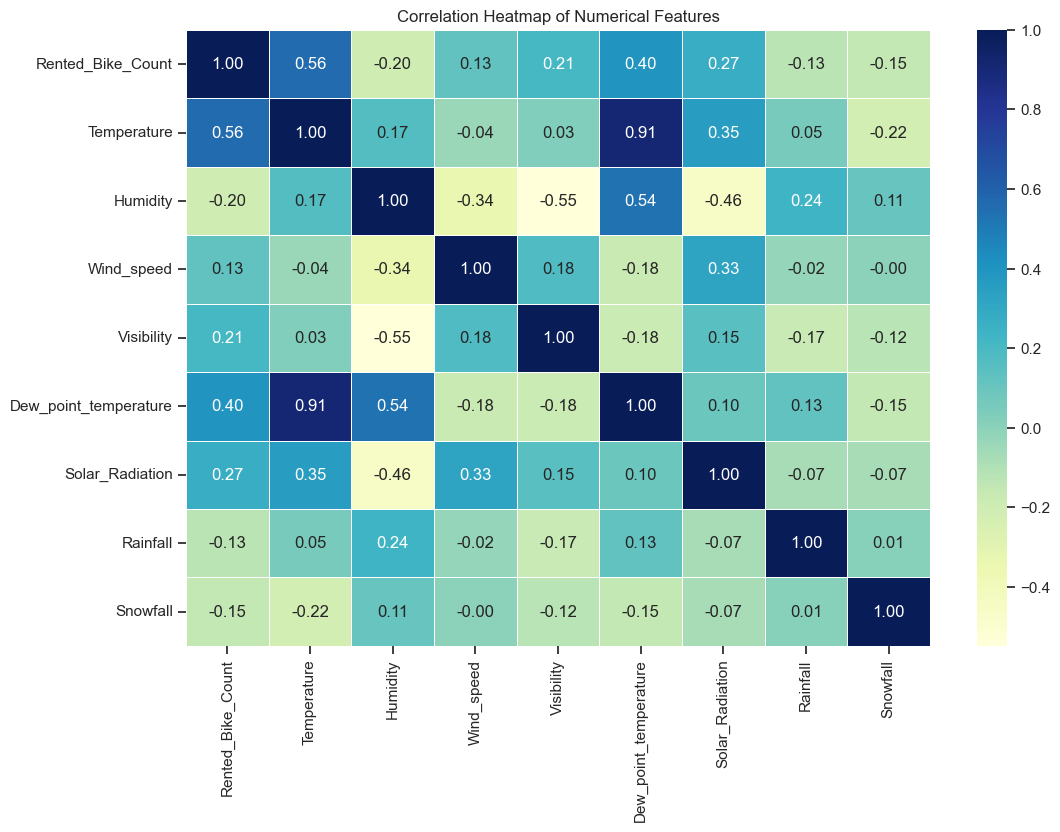

In [406]:
plt.figure(figsize=(12, 8))
corr_matrix = value[num_feature].corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='YlGnBu',
    linewidths=0.5,
    fmt=".2f"
)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


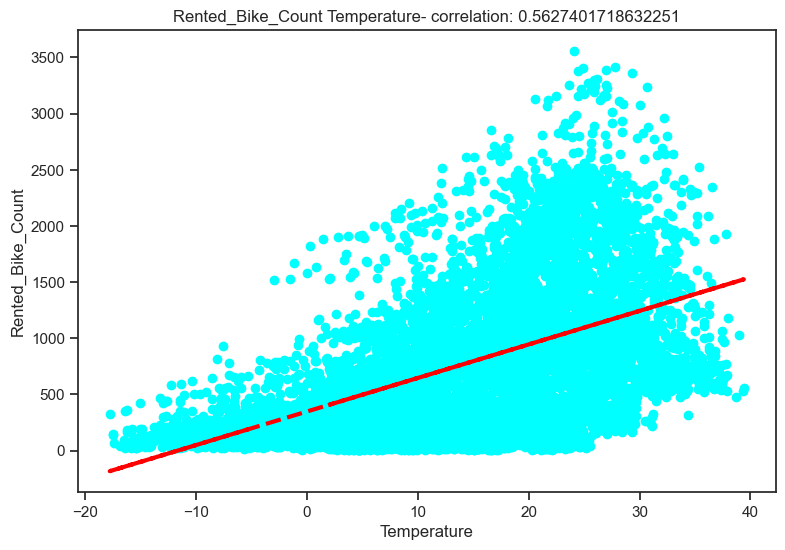

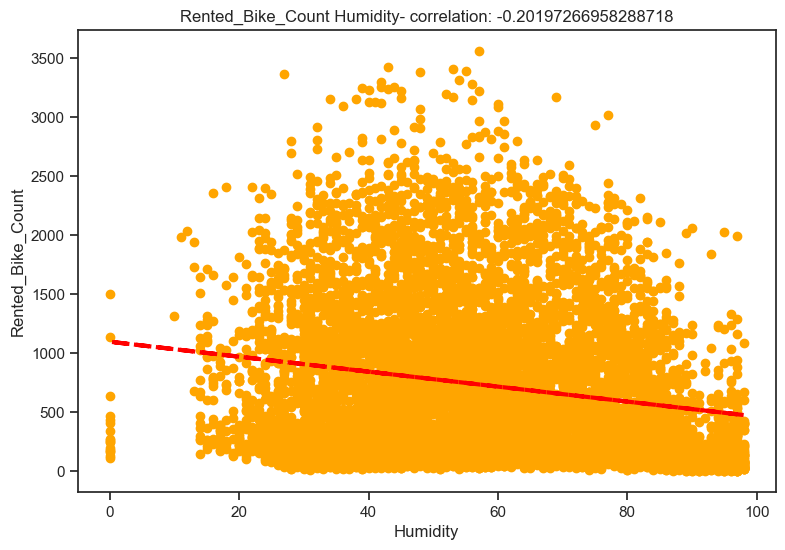

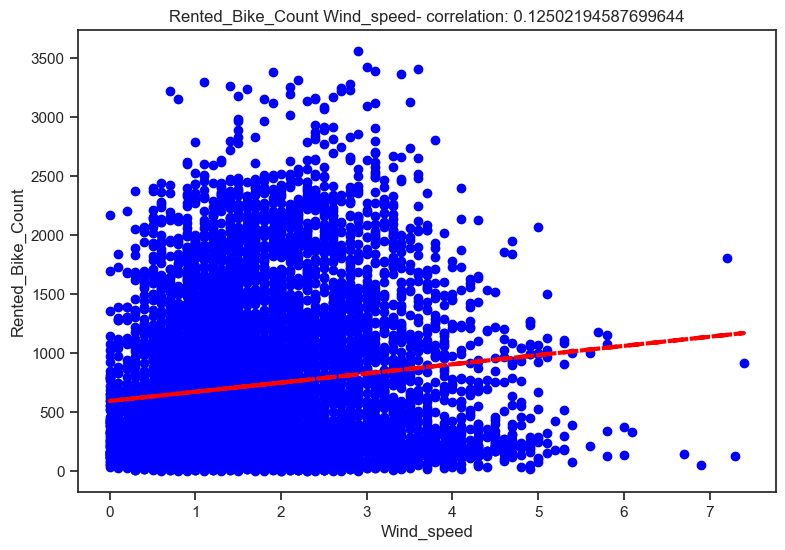

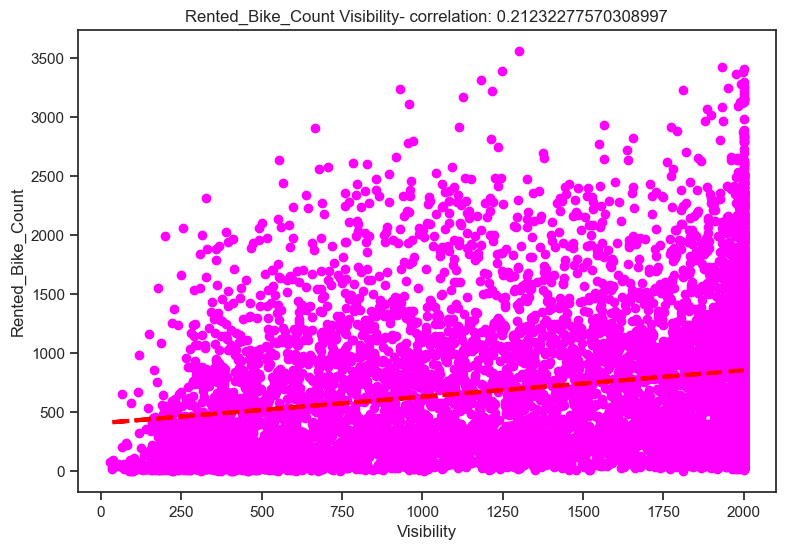

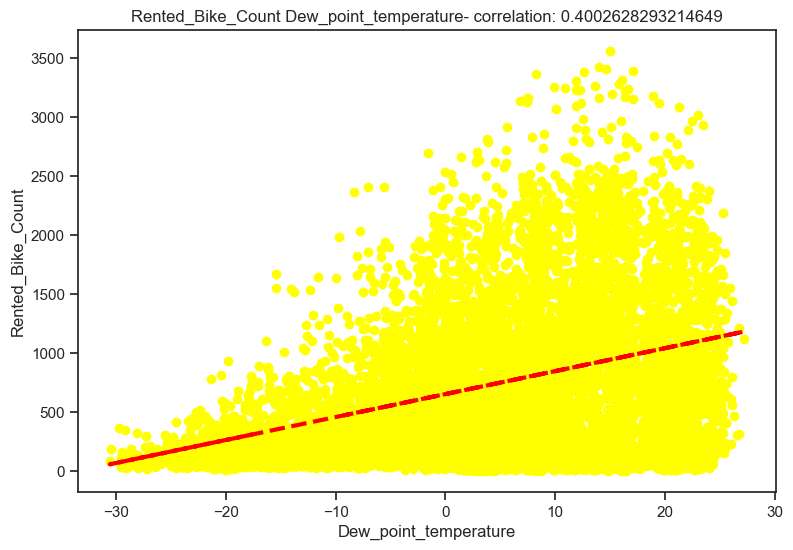

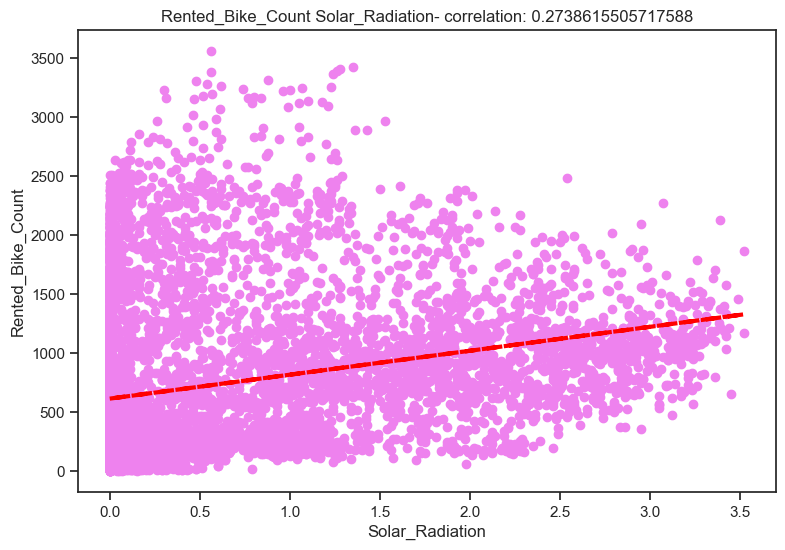

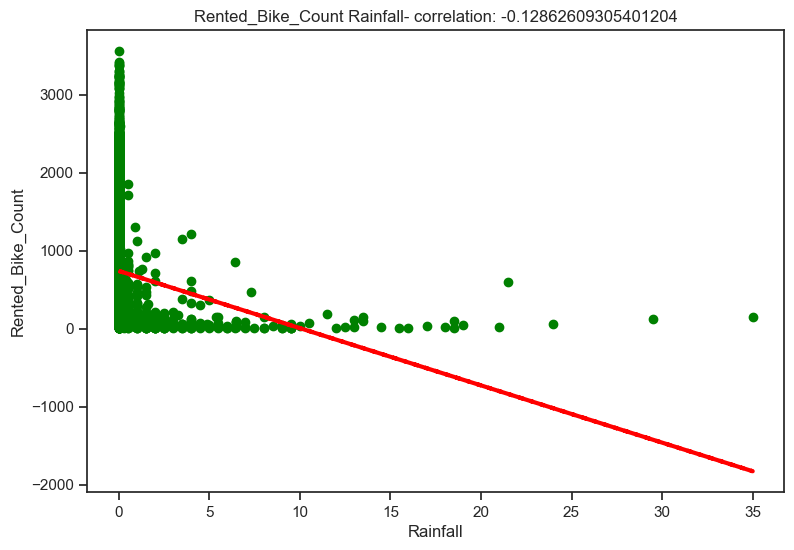

In [407]:
#before removing multicollinearity, drwaing plot to see all other linear realtion
import itertools

colors = itertools.cycle(["cyan",'orange', "b", "magenta",  'yellow','violet', 'green' ]) #itertool helps in iterating over diff. values in list 
for col in num_feature[0:-1]:
    if col == 'Rented_Bike_Count':
      pass
    else:
      fig = plt.figure(figsize=(9, 6))
      sns.set_context('notebook')
      ax = fig.gca()
      feature = value[col]
      label = value['Rented_Bike_Count']
      correlation = feature.corr(label)
      plt.scatter(x=feature, y=label,color=next(colors))
      plt.xlabel(col)
      plt.ylabel('Rented_Bike_Count')
      ax.set_title('Rented_Bike_Count ' + col + '- correlation: ' + str(correlation))
      z = np.polyfit(value[col], value['Rented_Bike_Count'], 1)
      y_hat = np.poly1d(z)(value[col])

      plt.plot(value[col], y_hat, "r--", lw=3)

plt.show()

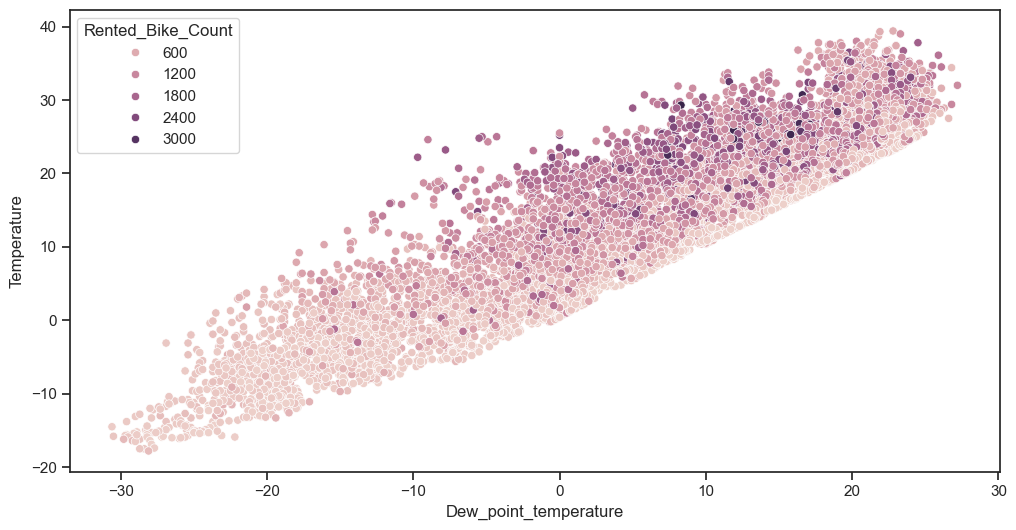

In [408]:
#scatter plot between Dew point temperature and temperature
plt.figure(figsize = (12,6))
sns.scatterplot(x=value["Dew_point_temperature"],y= value["Temperature"],hue=value['Rented_Bike_Count']); # both are correlated

# **VIF (Variance Inflation Factor)**

* VIF tells you how much a feature is affected by multicollinearity. Is this feature giving new information, or is it copying another feature?
* Vif **starts** at **1** and has **no upper limit**.

* **1-5** : **Moderate**, No corrective measure

* **Greater than 5**: **Severe**, Coefficient and p-value are questionable

In [409]:
# Calculating VIF
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [410]:
#calculating vif
calc_vif(value[[i for i in value.describe().columns if i not in ['Rented_Bike_Count']]])

variables    VIF
0            Temperature 28.965
1               Humidity  5.018
2             Wind_speed  4.521
3             Visibility  9.043
4  Dew_point_temperature 15.390
5        Solar_Radiation  2.808
6               Rainfall  1.080
7               Snowfall  1.121

* Since VIF score for temperature and dew point temperature is more than 10, either dropping one value or combining both value can help getting better solution, since temperature and dew point temperature show relation.

In [411]:
#calculating vif by ignoring dew point temperature
calc_vif(value[[i for i in value.describe().columns if i not in ['Rented_Bike_Count','Dew_point_temperature']]])

variables   VIF
0      Temperature 3.103
1         Humidity 4.712
2       Wind_speed 4.089
3       Visibility 4.403
4  Solar_Radiation 2.233
5         Rainfall 1.079
6         Snowfall 1.121

In [412]:
#calculating vif by ignoring temperature
calc_vif(value[[i for i in value.describe().columns if i not in ['Rented_Bike_Count','Temperature']]])

variables   VIF
0               Humidity 4.997
1             Wind_speed 4.271
2             Visibility 4.639
3  Dew_point_temperature 1.649
4        Solar_Radiation 1.891
5               Rainfall 1.080
6               Snowfall 1.113

In [413]:
# finding correlation between functioning day and rented bike count
corr = trial[['Rented_Bike_Count','Hour','Temperature','Dew_point_temperature']].corr()
corr

Rented_Bike_Count  Hour  Temperature  \
Rented_Bike_Count                  1.000 0.410        0.539   
Hour                               0.410 1.000        0.124   
Temperature                        0.539 0.124        1.000   
Dew_point_temperature              0.380 0.003        0.913   

                       Dew_point_temperature  
Rented_Bike_Count                      0.380  
Hour                                   0.003  
Temperature                            0.913  
Dew_point_temperature                  1.000

* Dew point temperature when compared with rented bike count has 0.38 correlation coefficient which can be [ignored](https://www.scribbr.com/statistics/pearson-correlation-coefficient/) compared to the value of temperature and it is clear from above vif that when dew point dropped, give a promising vif score for other.
* Since, each feature has VIF score less than 10 which is good for  analysis.

### **Catergorizing variable/ Encoding Categorial Variable**

In [414]:
#since day is categorised as working day and weekend, dropping day column along with dew point
values = value.drop(columns=['day'], axis = 1)

In [415]:
values = values.drop(columns =['year'], axis = 1)

In [416]:
values = values.drop(columns=['Dew_point_temperature'], axis = 1)

In [417]:
num = values.select_dtypes(exclude ='object')
cat = values.select_dtypes(include ='object')
print(f' numeric: {num.columns.to_list()}\n categorial : {cat.columns.to_list()}')

 numeric: ['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall']
 categorial : ['Hour', 'Seasons', 'Holiday', 'month', 'week']


* since our value has 5 different categorial values, it is better to get them encoded 

In [418]:
value.head()

Rented_Bike_Count Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254    0       -5.200        37       2.200        2000   
1                204    1       -5.500        38       0.800        2000   
2                173    2       -6.000        39       1.000        2000   
3                107    3       -6.200        40       0.900        2000   
4                 78    4       -6.000        36       2.300        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                -17.600            0.000     0.000     0.000  Winter   
1                -17.600            0.000     0.000     0.000  Winter   
2                -17.700            0.000     0.000     0.000  Winter   
3                -17.600            0.000     0.000     0.000  Winter   
4                -18.600            0.000     0.000     0.000  Winter   

      Holiday month     day  year         week  
0  No Holiday   Dec  Friday  2017  workingdays  
1  No Holiday   Dec  Friday  2017  workingdays  
2  No Holiday   Dec  Friday  2017  workingdays  
3  No Holiday   Dec  Friday  2017  workingdays  
4  No Holiday   Dec  Friday  2017  workingdays

In [419]:
#applying label encoder
encoded = values.apply(LabelEncoder().fit_transform)
encoded.head(1)

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                252     0          111        28          22        1779   

   Solar_Radiation  Rainfall  Snowfall  Seasons  Holiday  month  week  
0                0         0         0        3        1      2     1

In [420]:
#encoding using dummies
dumcoded = pd.get_dummies(values,drop_first=True,sparse=True)
dumcoded.head(1)

Rented_Bike_Count  Temperature  Humidity  Wind_speed  Visibility  \
0                254       -5.200        37       2.200        2000   

   Solar_Radiation  Rainfall  Snowfall  Hour_1  Hour_2  ...  month_Feb  \
0            0.000     0.000     0.000   False   False  ...      False   

   month_Jan  month_Jul  month_Jun  month_Mar  month_May  month_Nov  \
0      False      False      False      False      False      False   

   month_Oct  month_Sep  week_workingdays  
0      False      False              True  

[1 rows x 47 columns]

* When encoded using dummies, column size is increased to 47. Therefore, using label encoded values in futher process, however there is no issue in using get_dummies but sometime it may led to [dummy variable trap](https://www.geeksforgeeks.org/ml-dummy-variable-trap-in-regression-models/) which can again cause multicollinearity.

### **Tranformation / Gausssian Transformation**


---


* As in the above study, Bike Rented count has shown positive skewness, it is better to get it normalised. The purpose of transformation is to convert the values of the dataset's numeric columns to a standard scale without distorting the distinctions between different value ranges or omitting crucial details. Transformation can be achieved using different techniques i.e., either taking log, square root or cuberoot for the value.
* square-root for moderate skew: sqrt(x) for positively skewed data, sqrt(max(x+1) - x) for negatively skewed data

* log for greater skew: log10(x) for positively skewed data, log10(max(x+1) - x) for negatively skewed data

* inverse for severe skew: 1/x for positively skewed data 1/(max(x+1) - x) for negatively skewed data

* Linearity and heteroscedasticity: First try log transformation in a situation where the dependent variable starts to increase more rapidly with increasing independent variable values If your data does the opposite – dependent variable values decrease more rapidly with increasing independent variable values – you can first consider a square transformation.


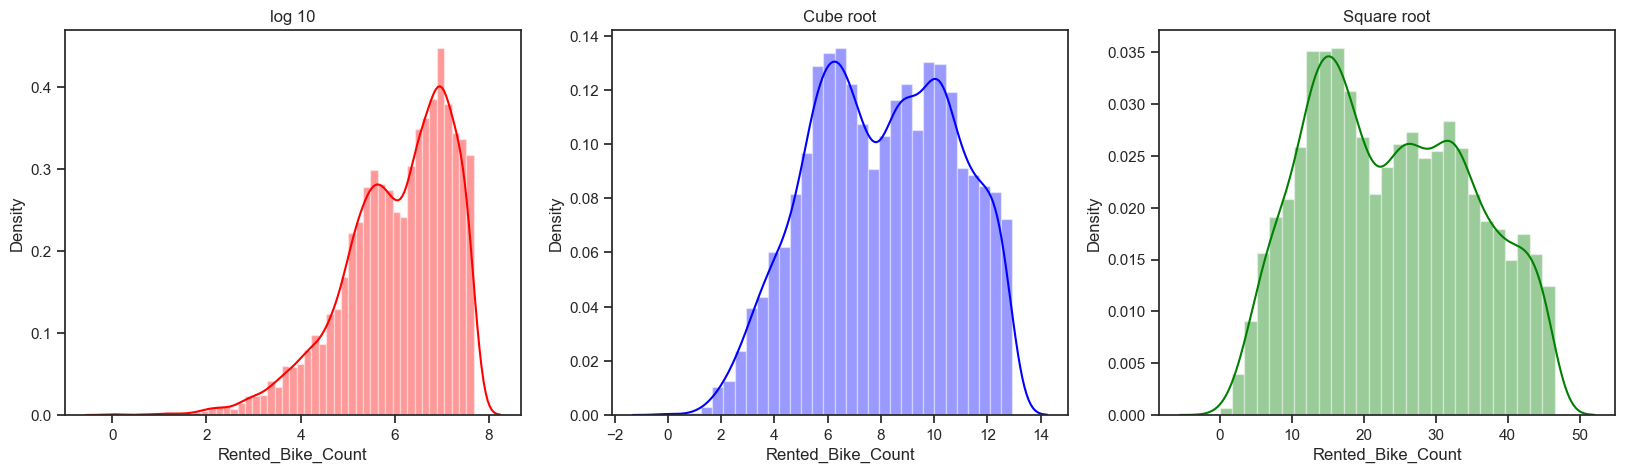

In [421]:
# Dependent variable 'Rented_Bike_Count'
fig,axes = plt.subplots(1,3,figsize=(20,5))
# here we use log10 
sns.distplot(np.log1p(encoded['Rented_Bike_Count']),ax=axes[0],color='red').set_title("log 10"); #np.log1p : Return the natural logarithm of one plus the input array, element-wise
# here we use cube root 
sns.distplot(np.cbrt(encoded['Rented_Bike_Count']),ax=axes[1],color='blue').set_title("Cube root");
# here we use square root 
sns.distplot(np.sqrt(encoded['Rented_Bike_Count']),ax=axes[2], color='green').set_title("Square root");

* From the above graph, taking square root shows much promising result, therefore choosing square root method for transformation.
* When used log tranformation, graph changed from right skewed to left skewed and same can be seen using cube root.

In [422]:
# applying square root on Rented_Bike_Count
encoded['Rented_Bike_Count']=np.sqrt(encoded['Rented_Bike_Count'])

## **MODEL TRAINING**

* A model defines the relationship between features and label.A feature is an input variable—the x variable in simple linear regression.A label is the thing we're predicting—the y variable in simple linear regression.Training means creating or learning the model.In order to build the predictive model, it's time to implement some of the model training on the above selected feature. 

Following algorithms have been used for predictions:-

* Linear Regression
* Lasso Regression
* Ridge Regression
* KNeighborsRegressor
* Random Forest Regression

Boosting

Boosting is a method used in machine learning to reduce errors in predictive data analysis.Boosting improves machine models' predictive accuracy and performance by converting multiple weak learners into a single strong learning model. Machine learning models can be weak learners(have low prediction accuracy, similar to random guessing,prone to overfitting) or strong learners(higher prediction accuracy). Boosting converts a system of weak learners into a single strong learning system. 
 
* XGB Regressor - provides parallel tree boosting,trees grow depth-wise


### **Splitting Data**

In [423]:
#X = independent variable and y = target variable
X=encoded.drop('Rented_Bike_Count',axis=1)
y=encoded['Rented_Bike_Count']

In [424]:
X.head(1)

Hour  Temperature  Humidity  Wind_speed  Visibility  Solar_Radiation  \
0     0          111        28          22        1779                0   

   Rainfall  Snowfall  Seasons  Holiday  month  week  
0         0         0        3        1      2     1

In [425]:
#spilitting into test and train data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)      

In [426]:
print(f'Shape of X_train => {X_train.shape}, Shape of X_test => {X_test.shape}' )
print(f'Shape of y_train => {y_train.shape}, Shape of y_test => {y_test.shape}' )

Shape of X_train => (6348, 12), Shape of X_test => (2117, 12)
Shape of y_train => (6348,), Shape of y_test => (2117,)


In [427]:
encoded.head()

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0             15.875     0          111        28          22        1779   
1             14.213     1          108        29           8        1779   
2             13.077     2          103        30          10        1779   
3             10.247     3          101        31           9        1779   
4              8.718     4          103        27          23        1779   

   Solar_Radiation  Rainfall  Snowfall  Seasons  Holiday  month  week  
0                0         0         0        3        1      2     1  
1                0         0         0        3        1      2     1  
2                0         0         0        3        1      2     1  
3                0         0         0        3        1      2     1  
4                0         0         0        3        1      2     1

### **Applying different algorithm**

#### **Feature Scaling**

---

* **Normalization** The primary objective of normalisation is to **homogenise** the data **across** all **records** and fields. It **aids** in connecting the entering data, which in turn helps in **cleaning and enhancing** data **quality**. Normalization is used when the data values are skewed and do not follow gaussian distribution.
The data values get converted between a range of 0 and 1.
The goal of normalization is to transform features to be on a similar scale. This improves the performance and training stability of the model.
* Four common [***normalization***](https://developers.google.com/machine-learning/data-prep/transform/normalization) techniques may be useful:
  1. scaling to a range
  2. clipping
  3. log scaling
  4. z-score

* **Standardization** is the process of placing dissimilar features on the same scale. Standardization is used on the data values that are normally distributed. By applying standardization, we tend to make the mean of the dataset as 0 and the standard deviation equivalent to 1.
That is, by standardizing the values, we get the following statistics of the data distribution
  1. mean = 0
  2. standard deviation = 1

In [428]:
#scaling feature 
scaler = StandardScaler()
# standardization
X_train = scaler.fit_transform(X_train)           #fit_transform = performs fit and transform on the input data at a single time 
X_test = scaler.transform(X_test)

* **NOTE:** [Difference](https://www.javatpoint.com/fit-transform-and-fit_transform-methods-in-python) between fit(), transform(), fit_transform().

#### **MODELS**

In [429]:
model1 = [
          ['Linear Regression ', LinearRegression()],
           ['Lasso ', Lasso(alpha =0.1 , max_iter= 2000)],
           ['Ridge ', Ridge(alpha =0.1 , max_iter= 2000)],
           ['KNeighborsRegressor ',  neighbors.KNeighborsRegressor()],
           ['RandomForest ',RandomForestRegressor(criterion='absolute_error',random_state=42)]        
        ]

    ====================  Linear Regression  ====================


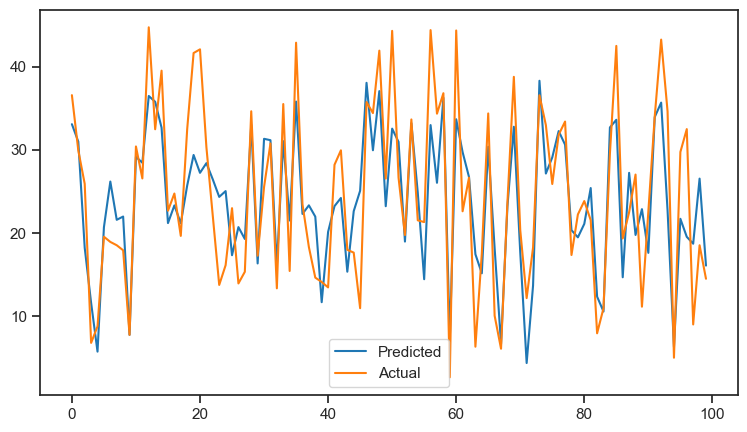

    ====================  Lasso  ====================


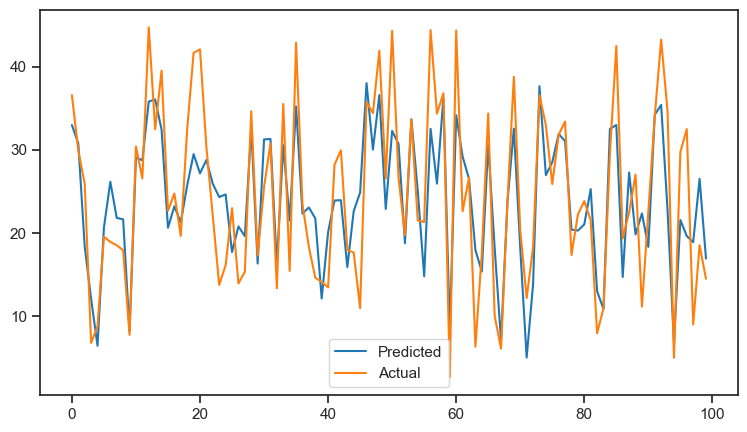

    ====================  Ridge  ====================


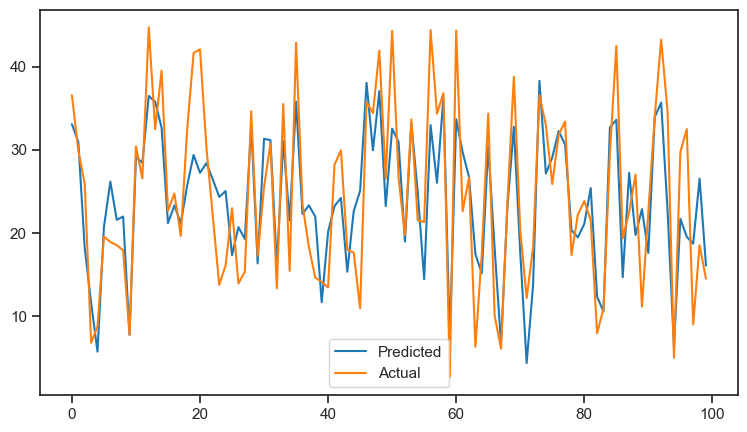

    ====================  KNeighborsRegressor  ====================


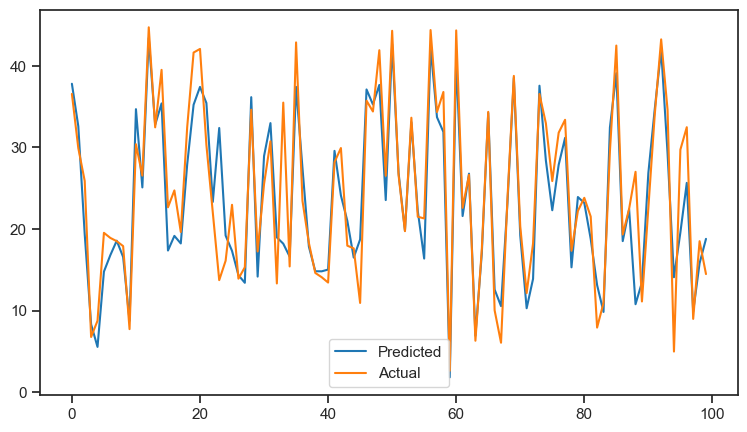

    ====================  RandomForest  ====================


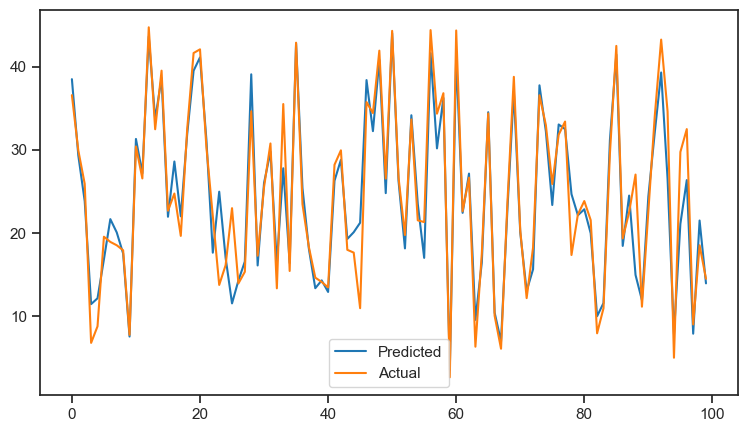

In [430]:
#running the models and getting the scores
model_score = []
for name,model in model1 :
    model_data = {}
    model_data["Name"] = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    model_data["MSE"] = mse(y_test, y_pred)
    model_data["RMSE"] = np.sqrt(model_data["MSE"])
    model_data["R2_Score"] = r2(y_test, y_pred)
    model_data["ADJ_R2"] = 1-(1-r2(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print(f'    {20* "="}  {name} {20* "="}')  # plot actual vs predicted graph
    plt.figure(figsize=(9,5))
    plt.plot((y_pred)[:100])
    plt.plot((np.array(y_test)[:100]))
    plt.legend(["Predicted","Actual"])
    plt.show()
    model_score.append(model_data)

In [431]:
#result for model 
model1_df = pd.DataFrame(model_score)
model1_df

Name    MSE  RMSE  R2_Score  ADJ_R2
0    Linear Regression  41.671 6.455     0.660   0.658
1                Lasso  41.713 6.459     0.659   0.657
2                Ridge  41.671 6.455     0.660   0.658
3  KNeighborsRegressor  21.818 4.671     0.822   0.821
4         RandomForest   8.860 2.976     0.928   0.927

In [432]:
model1_df.sort_values(by=['R2_Score'], ascending = False)

Name    MSE  RMSE  R2_Score  ADJ_R2
4         RandomForest   8.860 2.976     0.928   0.927
3  KNeighborsRegressor  21.818 4.671     0.822   0.821
0    Linear Regression  41.671 6.455     0.660   0.658
2                Ridge  41.671 6.455     0.660   0.658
1                Lasso  41.713 6.459     0.659   0.657

**Boosting**

In [433]:
#boosting algorithm 
model2 = [
           ['XGBRegressor ', XGBRegressor(objective= 'reg:squarederror')]  
]

    ====================  XGBRegressor  ====================


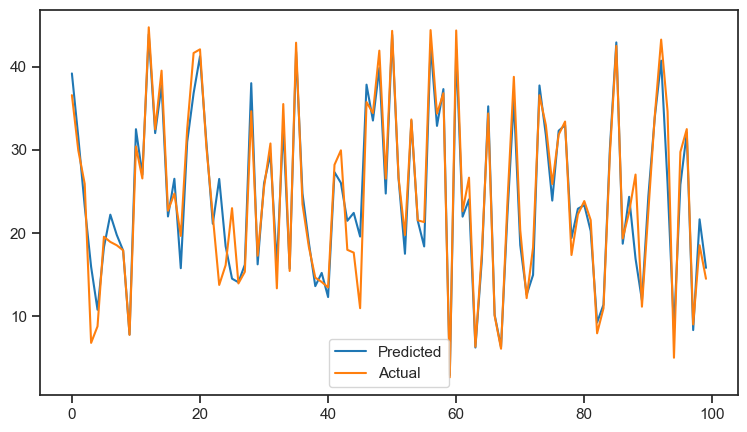

In [434]:
#running the models and getting the scores
model_score2 = []
for name,model in model2 :
    model_data = {}
    model_data["Name"] = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    model_data["MSE"] = mse(y_test, y_pred)
    model_data["RMSE"] = np.sqrt(model_data["MSE"])
    model_data["R2_Score"] = r2(y_test, y_pred)
    model_data["ADJ_R2"] = 1-(1-r2(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print(f'    {20* "="}  {name} {20* "="}')  # plot actual vs predicted graph
    plt.figure(figsize=(9,5))
    plt.plot((y_pred)[:100])
    plt.plot((np.array(y_test)[:100]))
    plt.legend(["Predicted","Actual"])
    plt.show()
    model_score2.append(model_data)

In [435]:
model2_df = pd.DataFrame(model_score2)
model2_df

Name   MSE  RMSE  R2_Score  ADJ_R2
0  XGBRegressor  7.150 2.674     0.942   0.941

In [436]:
#merging final result
a = [model1_df,model2_df]
final = pd.concat(a,ignore_index=True)
final.sort_values('R2_Score', ascending =False)

Name    MSE  RMSE  R2_Score  ADJ_R2
5         XGBRegressor   7.150 2.674     0.942   0.941
4         RandomForest   8.860 2.976     0.928   0.927
3  KNeighborsRegressor  21.818 4.671     0.822   0.821
0    Linear Regression  41.671 6.455     0.660   0.658
2                Ridge  41.671 6.455     0.660   0.658
1                Lasso  41.713 6.459     0.659   0.657

* From the above result, it is clear that non linear algorithm like xgbregressor, lightgbm,gradientboostingregressor and randomforest best fit for our problem.

### **Optimization** 

# XGB 

In [438]:
model = XGBRegressor(objective= 'reg:squarederror',subsample=0.7)

In [439]:
params = {
     'gamma' : [ -0.5, 0, 0.5, 1],
    'learning_rate' :[0.001, 0.01, 0.1, 5,10 ],
    'n_estimators' : [25,50,75,100,500] ,
    'max_depth' : [3, 5, 7,10]
        }

In [440]:
gridsearch = GridSearchCV(model , params , cv=2 , return_train_score=True)

In [441]:
gridsearch.fit(X_train , y_train )

GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'gamma': [-0.5, 0, 0.5, 1],
                         'learning_rate': [0.001, 0.01, 0.1, 5, 10],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [25, 50, 75, 100, 500]},
             return_train_score=True)

In [442]:
#print best parameters
print(gridsearch.best_params_)

{'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500}


In [443]:
#making prediciton
gridsearch_predictions = gridsearch.predict( X_test ) 

In [444]:
XGBRegressor_with_hyper = {
'Name': "XGBRegressor_with_hyper",
'MSE': [mse(y_test,gridsearch.predict(X_test))],
'RMSE': [np.sqrt(mse(y_test,gridsearch.predict(X_test)))],
'R2_Score': [r2(y_test,gridsearch_predictions)],
'ADJ_R2': [1-(1-r2(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))],
}

In [445]:
#concating hyperparameter tuned value with ealier result
Result = pd.DataFrame.from_dict(XGBRegressor_with_hyper)
#merging final result
b = [final,Result]
final_df = pd.concat(b,ignore_index=True)
final_df.sort_values('R2_Score', ascending =False)

Name    MSE  RMSE  R2_Score  ADJ_R2
6  XGBRegressor_with_hyper  6.640 2.577     0.946   0.941
5            XGBRegressor   7.150 2.674     0.942   0.941
4            RandomForest   8.860 2.976     0.928   0.927
3     KNeighborsRegressor  21.818 4.671     0.822   0.821
0       Linear Regression  41.671 6.455     0.660   0.658
2                   Ridge  41.671 6.455     0.660   0.658
1                   Lasso  41.713 6.459     0.659   0.657

In [446]:
y_pred_XGB = gridsearch.predict( X_test ) 

In [ ]:
pd.DataFrame(zip(y_test, y_pred_XGB, (y_test - y_pred_XGB)), columns = ['actual', 'predicted', 'Difference(act-pre)'])[:10]

### **Feature Importance**

In [ ]:
# assigning best estimator
rf_optimal_model = gridsearch.best_estimator_

In [ ]:
#displaying feature importance
rf_optimal_model.feature_importances_

In [ ]:
#getting columns name as X_train is array and column name 0,1,2, etc
t = pd.DataFrame(X_train, columns = X.columns)

In [ ]:
#creating new dataframe for feature and its importance value
importances = rf_optimal_model.feature_importances_

importance_dict = {'Feature' : list(t.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
#sorting feature imortance from highest to lowest
importance_df.sort_values(by=['Feature Importance'],ascending=False)

In [ ]:
#plotting pie plot for feature importance using plotly
fig = px.pie(importance_df, values='Feature Importance', names='Feature', title='Feature Importance');
#
fig.update_traces(textposition='inside', textinfo='percent+label');
fig.show();

## **CONCLUSION**

* **xgbregressor**  model shows promising result, therefore it can be used to solve this problem.

* Bike rental count is high during week days than on weekend.

* Bike demand shows peek around 8-9 AM in the morning and 6 - 7pm in the evening.

* People prefer to rent bike more in summer than in winter.

* Bike demand is more on clear days than on snowy or rainy days.

* Temperature range from 22 to 25(°C) has more demand for bike.  

* 'Hour', 'Temperature(°C)', 'Humidity', 'Wind_speed','Visibility ', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'month', 'day of week ' regulates bike demand.